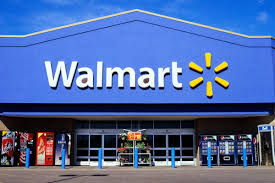

#Walmart

About Walmart

* Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem**

* The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


**Dataset**

* The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

* User_ID:	User ID
* Product_ID:	Product ID
* Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation(Masked)
* City_Category:	Category of the City (A,B,C)
* StayInCurrentCityYears:	Number of years stay in current city
* Marital_Status:	Marital Status
* ProductCategory:	Product Category (Masked)
* Purchase:	Purchase Amount


#Analysing basic metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

In [2]:
!gdown 1Gc1TpIM7yZ0iPEQxUXyIdkyEdb7pWf3R

Downloading...
From: https://drive.google.com/uc?id=1Gc1TpIM7yZ0iPEQxUXyIdkyEdb7pWf3R
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 86.4MB/s]


In [3]:
walmart_df = pd.read_csv("walmart_data.csv")

In [4]:
walmart_df.shape

(550068, 10)

In [5]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
walmart_df.columns = [name.lower() for name in walmart_df.columns]
walmart_df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category',
       'purchase'],
      dtype='object')

In [7]:
walmart_df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
walmart_df.columns.tolist()

['user_id',
 'product_id',
 'gender',
 'age',
 'occupation',
 'city_category',
 'stay_in_current_city_years',
 'marital_status',
 'product_category',
 'purchase']

In [9]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   user_id                     550068 non-null  int64 
 1   product_id                  550068 non-null  object
 2   gender                      550068 non-null  object
 3   age                         550068 non-null  object
 4   occupation                  550068 non-null  int64 
 5   city_category               550068 non-null  object
 6   stay_in_current_city_years  550068 non-null  object
 7   marital_status              550068 non-null  int64 
 8   product_category            550068 non-null  int64 
 9   purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
walmart_df.isnull().sum()

,0
user_id,0
product_id,0
gender,0
age,0
occupation,0
city_category,0
stay_in_current_city_years,0
marital_status,0
product_category,0
purchase,0


* There is no null values found in the above dataset.

In [11]:
walmart_df.describe()

,user_id,occupation,marital_status,product_category,purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


* There are 5,50,068 rows and 10 columns
* There are Male (414529) and Female (135809)
* The Mean purchase amount is 9263
* There are 8 Prodcuts Categories in the dataset

In [12]:
walmart_df.describe(include=object)

,product_id,gender,age,city_category,stay_in_current_city_years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [13]:
unique_cus = walmart_df["user_id"].nunique()
unique_cus

5891

In [14]:
np.round(walmart_df['gender'].value_counts( normalize= True)*100,2).reset_index()

,gender,proportion
0,M,75.31
1,F,24.69


In [15]:
np.round(walmart_df['city_category'].value_counts(normalize=True)*100,2).reset_index()

,city_category,proportion
0,B,42.03
1,C,31.12
2,A,26.85


In [16]:
np.round(walmart_df["stay_in_current_city_years"].value_counts(normalize=True)*100,2).reset_index()

,stay_in_current_city_years,proportion
0,1,35.24
1,2,18.51
2,3,17.32
3,4+,15.40
4,0,13.53


In [17]:
np.round(walmart_df["marital_status"].value_counts(normalize=True)*100,2).reset_index()

,marital_status,proportion
0,0,59.03
1,1,40.97


In [18]:
np.round(walmart_df["product_category"].value_counts(normalize=True)*100,2).reset_index()

,product_category,proportion
0,5,27.44
1,1,25.52
2,8,20.71
3,11,4.42
4,2,4.34
5,6,3.72
6,3,3.67
7,4,2.14
8,16,1.79
9,15,1.14


In [19]:
walmart_df["occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [20]:
walmart_df["marital_status"].value_counts()

,count
marital_status,
0,324731
1,225337


In [21]:
np.round(walmart_df["marital_status"].value_counts(normalize =True)*100,2).reset_index()

,marital_status,proportion
0,0,59.03
1,1,40.97


In [22]:
walmart_df["age"].value_counts().reset_index()

,age,count
0,26-35,219587
1,36-45,110013
2,18-25,99660
3,46-50,45701
4,51-55,38501
5,55+,21504
6,0-17,15102


In [23]:
walmart_df["age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [24]:
walmart_df["gender"].unique().tolist()

['F', 'M']

In [25]:
walmart_df["marital_status"].unique().tolist()

[0, 1]

In [26]:
walmart_df["user_id"].nunique()

5891

In [27]:
walmart_df["product_id"].nunique()

3631

In [28]:
walmart_df.groupby(["gender"])["age"].agg("count")

,age
gender,
F,135809
M,414259


In [29]:
walmart_df.groupby(["age","gender"]).agg("count")["user_id"].reset_index().rename({"user_id":"count_of_customers"}, axis= 1)

,age,gender,count_of_customers
0,0-17,F,5083
1,0-17,M,10019
2,18-25,F,24628
3,18-25,M,75032
4,26-35,F,50752
5,26-35,M,168835
6,36-45,F,27170
7,36-45,M,82843
8,46-50,F,13199
9,46-50,M,32502


In [30]:
walmart_df.groupby(["age","occupation"]).agg("count")["user_id"].reset_index().rename({"user_id":"count_of_customers"}, axis= 1)

,age,occupation,count_of_customers
0,0-17,0,2134
1,0-17,1,387
2,0-17,2,144
3,0-17,4,113
4,0-17,7,139
...,...,...,...
129,55+,16,1963
130,55+,17,1558
131,55+,18,112
132,55+,19,217


In [31]:
walmart_df.groupby(["age","city_category"]).agg("count")["user_id"].reset_index().rename({"user_id":"count_of_customers"}, axis= 1)

,age,city_category,count_of_customers
0,0-17,A,2544
1,0-17,B,5435
2,0-17,C,7123
3,18-25,A,27535
4,18-25,B,43247
5,18-25,C,28878
6,26-35,A,73745
7,26-35,B,91584
8,26-35,C,54258
9,36-45,A,26617


In [32]:
walmart_df.groupby(["age","marital_status"]).agg("count")["user_id"].reset_index().rename({"user_id":"count_of_customers"}, axis= 1)

,age,marital_status,count_of_customers
0,0-17,0,15102
1,18-25,0,78544
2,18-25,1,21116
3,26-35,0,133296
4,26-35,1,86291
5,36-45,0,66377
6,36-45,1,43636
7,46-50,0,12690
8,46-50,1,33011
9,51-55,0,10839


In [33]:
df_new = walmart_df.groupby(["user_id"]).agg({"purchase": ["count", "sum"]}).reset_index()
df_new.columns = ["_".join(i) for i in df_new.columns]
df_new.rename({"user_id":"Customer_id", "purchase_count":"Number_of_purchases", "purchase_sum":"Amount_purchased"}, axis=1, inplace=True)
df_new

,user_id_,Number_of_purchases,Amount_purchased
0,1000001,35,334093
1,1000002,77,810472
2,1000003,29,341635
3,1000004,14,206468
4,1000005,106,821001
...,...,...,...
5886,1006036,514,4116058
5887,1006037,122,1119538
5888,1006038,12,90034
5889,1006039,74,590319


In [34]:
walmart_df["marital_status"] = walmart_df["marital_status"].replace({0:"single", 1:"married"})

In [35]:
walmart_df

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,single,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,married,20,368
550064,1006035,P00375436,F,26-35,1,C,3,single,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,married,20,137
550066,1006038,P00375436,F,55+,1,C,2,single,20,365


**What is the total Revenue generated by Walmart from each Marital Status ?**

In [36]:
marital_status_purchase = walmart_df.groupby(by = ["marital_status"])["purchase"].agg("sum").reset_index().rename({"purchase":"amount"}, axis= 1)
total_purchase = marital_status_purchase["amount"].sum()
marital_status_purchase["purchase_share"] = np.round((marital_status_purchase["amount"]/total_purchase)*100,2)
marital_status_purchase

,marital_status,amount,purchase_share
0,married,2086885295,40.95
1,single,3008927447,59.05


- Singles purchased more then married copule. There percentage of purchase 53% and 41% respectively.

In [37]:
gender_wise_purchase = walmart_df.groupby(by=["gender"])["purchase"].sum().reset_index().rename({"purchase":"amount"}, axis= 1)
gender_wise_purchase["percentage_share"] = np.round((gender_wise_purchase["amount"]/ total_purchase)*100,2)
gender_wise_purchase

,gender,amount,percentage_share
0,F,1186232642,23.28
1,M,3909580100,76.72


- **The Purchase value of Males is 77% and Females is 23%:**
- The purchase Males done more shopping then females

In [38]:
df1 = walmart_df.groupby(by=(["gender", "user_id"]))["purchase"].sum()
df1.groupby(by=["gender"]).mean().reset_index().rename({"purchase":"average_purchase"}, axis= 1)

,gender,average_purchase
0,F,712024.394958
1,M,925344.402367


**What is the Average Revenue generated by Walmart from each Gender per transaction ?**


In [39]:
walmart_df.groupby(by=(["gender"]))["purchase"].mean().reset_index().rename({"purchase":"average_purchase"}, axis= 1)

,gender,average_purchase
0,F,8734.565765
1,M,9437.526040


**How many unique customers are there for each Marital Status ?**


In [40]:
marital_status_dist = walmart_df.groupby('marital_status')['user_id'].unique().apply(len).reset_index().rename({"user_id": "unique_customers"}, axis= 1)
marital_status_dist["percentage"]= np.round((marital_status_dist["unique_customers"]/ unique_cus)*100,2)
marital_status_dist

,marital_status,unique_customers,percentage
0,married,2474,42.0
1,single,3417,58.0


**How many transactions are made by each Marital Status category ?**

In [41]:
walmart_df.groupby('marital_status')['user_id'].count().reset_index().rename({"user_id":"Transctions"},axis= 1)

,marital_status,Transctions
0,married,225337
1,single,324731


In [42]:
print('Average number of transactions made by each user with marital status Married is', round(225337 / 2474))
print('Average number of transactions made by each with marital status Single is', round(324731 / 3417))

Average number of transactions made by each user with marital status Married is 91
Average number of transactions made by each with marital status Single is 95


In [43]:
walmart_df.groupby('marital_status')

What is the average total purchase made by each user in each marital status ?


In [44]:
age_dest = walmart_df.groupby(by=['age'])['user_id'].unique().apply(len).reset_index().rename({"user_id":"transctions"},axis= 1)
age_dest = age_dest.sort_values("transctions", ascending=False)
age_dest["percentage"] = np.round((age_dest["transctions"]/unique_cus)*100,2)
age_dest["cummulative_sum"] = age_dest["percentage"].cumsum()
age_dest

,age,transctions,percentage,cummulative_sum
2,26-35,2053,34.85,34.85
3,36-45,1167,19.81,54.66
1,18-25,1069,18.15,72.81
4,46-50,531,9.01,81.82
5,51-55,481,8.16,89.98
6,55+,372,6.31,96.29
0,0-17,218,3.70,99.99


- About 82% of purchase was done by age between 18-50 age.
- The majority transction was made by age between 26-35 years. the value id about 35%.

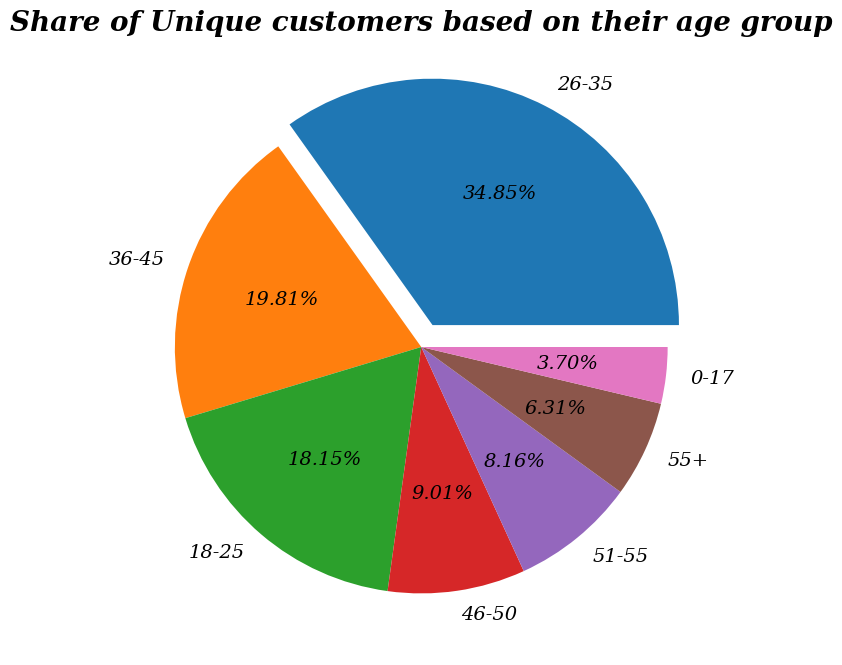

In [45]:
plt.figure(figsize = (8, 8))
plt.title('Share of Unique customers based on their age group', fontdict = {'fontsize' : 20,
 'fontstyle' : 'oblique',
'fontfamily' : 'serif',
'fontweight' : 600} )
plt.pie(x = age_dest['percentage'], labels = age_dest['age'],
 explode = [0.1] + [0] * 6, autopct = '%.2f%%',
 textprops = {'fontsize' : 14,
 'fontstyle' : 'oblique',
'fontfamily' : 'serif',
'fontweight' : 500})
plt.plot()
plt.show()

In [46]:
walmart_df["age"].value_counts()

,count
age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [47]:
age_purchase_value = walmart_df.groupby(by=["age"])["purchase"].sum().reset_index()
age_purchase_value = age_purchase_value.sort_values("purchase", ascending=False)
age_purchase_value["percentage"] = np.round((age_purchase_value["purchase"]/total_purchase)*100,2)
age_purchase_value['cummulative_percent'] = age_purchase_value["percentage"].cumsum()
age_purchase_value

,age,purchase,percentage,cummulative_percent
2,26-35,2031770578,39.87,39.87
3,36-45,1026569884,20.15,60.02
1,18-25,913848675,17.93,77.95
4,46-50,420843403,8.26,86.21
5,51-55,367099644,7.20,93.41
6,55+,200767375,3.94,97.35
0,0-17,134913183,2.65,100.00


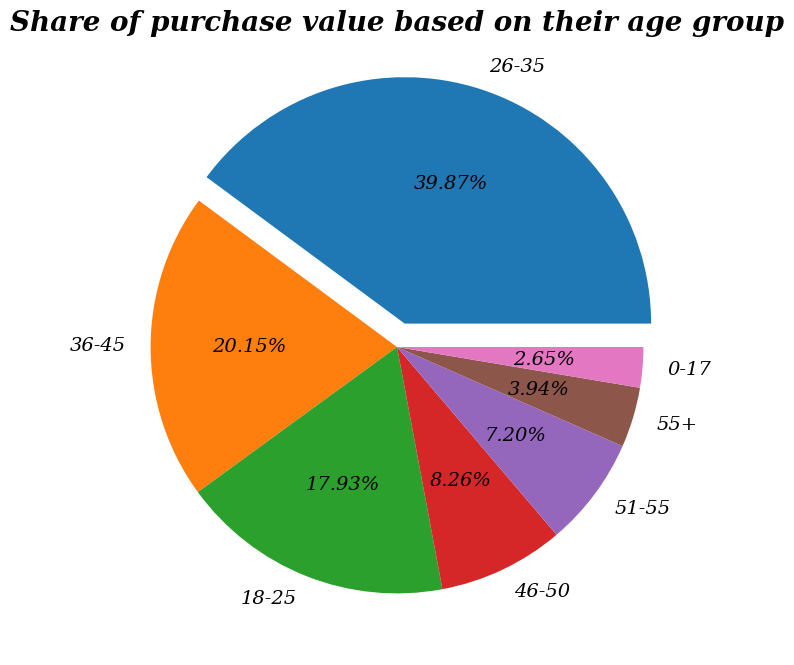

In [48]:
plt.figure(figsize = (8, 8))
plt.title('Share of purchase value based on their age group', fontdict = {'fontsize' : 20,
 'fontstyle' : 'oblique',
'fontfamily' : 'serif',
'fontweight' : 600} )
plt.pie(x = age_purchase_value['percentage'], labels = age_purchase_value['age'],
 explode = [0.1] + [0] * 6, autopct = '%.2f%%',
 textprops = {'fontsize' : 14,
 'fontstyle' : 'oblique',
'fontfamily' : 'serif',
'fontweight' : 500})
plt.plot()
plt.show()

In [49]:
city_wise = walmart_df.groupby(by=["city_category"])["user_id"].unique().apply(len).reset_index().rename({"user_id":"unique_customers"},axis= 1)
city_wise = city_wise.sort_values("unique_customers", ascending=False)
city_wise["percentage"] = np.round((city_wise['unique_customers']/unique_cus)*100,2)
city_wise["cummulative_sum"] = city_wise["percentage"].cumsum()
city_wise

,city_category,unique_customers,percentage,cummulative_sum
2,C,3139,53.28,53.28
1,B,1707,28.98,82.26
0,A,1045,17.74,100.00


- Majority of the total unique customers belong to the city C.
- 82.26 % of the total unique customers belong to city C and B.

In [50]:
walmart_df['city_category'].value_counts().reset_index()

,city_category,count
0,B,231173
1,C,171175
2,A,147720


**What is the revenue generated from different cities ?**

In [51]:
city_revenue_df = walmart_df.groupby("city_category")["purchase"].sum().reset_index().rename({"purchase":"total_amount"}, axis= 1)
city_revenue_df = city_revenue_df.sort_values("total_amount", ascending=False)
city_revenue_df["percentage"] = np.round((city_revenue_df['total_amount']/ total_purchase)*100,2)
city_revenue_df["cum_sum"] = city_revenue_df["percentage"].cumsum()
city_revenue_df

,city_category,total_amount,percentage,cum_sum
1,B,2115533605,41.52,41.52
2,C,1663807476,32.65,74.17
0,A,1316471661,25.83,100.00


In [52]:
walmart_df.groupby("product_category")["user_id"].nunique().reset_index().rename({"user_id":"customer_count"}, axis = 1)

,product_category,customer_count
0,1,5767
1,2,4296
2,3,3838
3,4,3361
4,5,5751
5,6,4085
6,7,1461
7,8,5659
8,9,410
9,10,2328


In [53]:
cat_purchase_df = walmart_df.groupby(by=["product_category"])["purchase"].sum().reset_index().rename({"purchase":"purchase_amount"}, axis = 1)
cat_purchase_df = cat_purchase_df.sort_values("purchase_amount", ascending=False)
cat_purchase_df["percentage"] = np.round((cat_purchase_df["purchase_amount"]/ total_purchase)*100,2)
cat_purchase_df["cummulative_sum"] = cat_purchase_df["percentage"].cumsum()
cat_purchase_df

,product_category,purchase_amount,percentage,cummulative_sum
0,1,1910013754,37.48,37.48
4,5,941835229,18.48,55.96
7,8,854318799,16.77,72.73
5,6,324150302,6.36,79.09
1,2,268516186,5.27,84.36
2,3,204084713,4.00,88.36
15,16,145120612,2.85,91.21
10,11,113791115,2.23,93.44
9,10,100837301,1.98,95.42
14,15,92969042,1.82,97.24


- **Top 5 product categories from which Walmart makes 84.36 % of total revenue are : [1, 5, 8, 6, 2]**

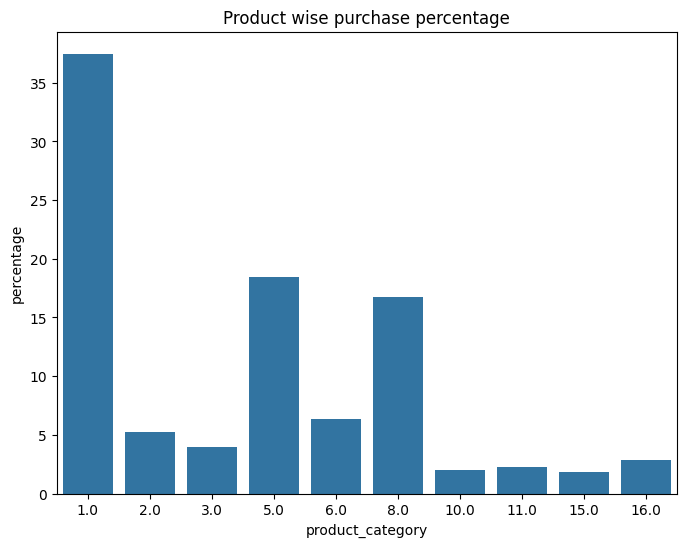

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(data= cat_purchase_df, x =cat_purchase_df["product_category"].head(10), y=cat_purchase_df["percentage"])
plt.title("Product wise purchase percentage")
plt.show()

In [55]:
gender_wise_purchase

,gender,amount,percentage_share
0,F,1186232642,23.28
1,M,3909580100,76.72


In [56]:
gender_wise_mean = walmart_df.groupby(by=["gender"])["purchase"].mean().reset_index().rename({"purchase":"average_purchase"}, axis= 1)
gender_wise_mean

,gender,average_purchase
0,F,8734.565765
1,M,9437.526040


In [57]:
city_revenue_df

,city_category,total_amount,percentage,cum_sum
1,B,2115533605,41.52,41.52
2,C,1663807476,32.65,74.17
0,A,1316471661,25.83,100.00


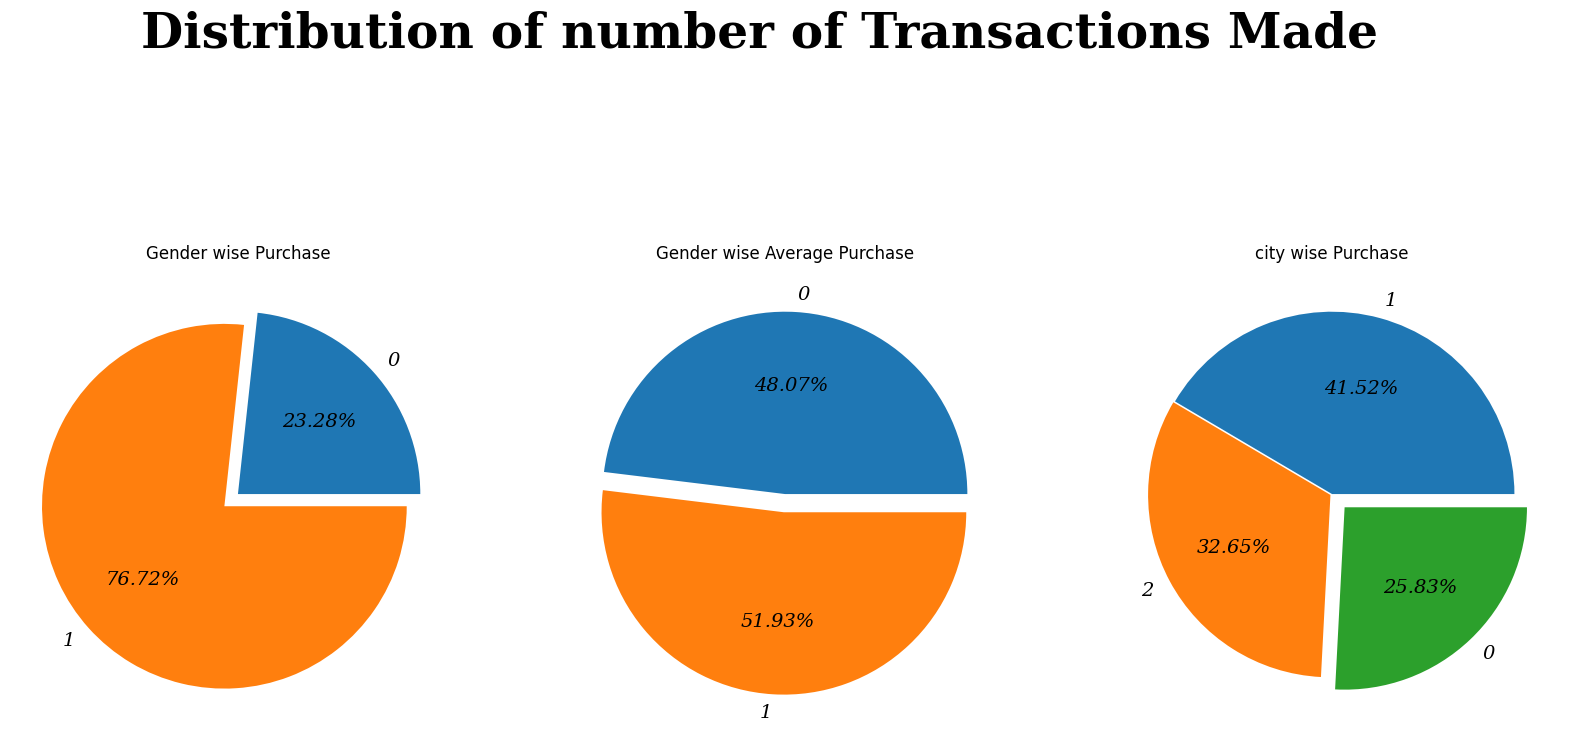

In [58]:
plt.figure(figsize=((20,10)))
plt.suptitle('Distribution of number of Transactions Made', fontsize = 35, fontweight = 600, fontfamily = 'serif')
plt.subplot(1,3, 1)
plt.pie(x=gender_wise_purchase['amount'].values, labels=gender_wise_purchase["percentage_share"].index, explode = [0, 0.1], autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
      'fontstyle' : 'oblique',
      'fontfamily' : 'serif',
      'fontweight' : 500} )
plt.title("Gender wise Purchase")

#second pie plot
plt.subplot(1, 3, 2)
plt.pie( labels=gender_wise_mean["gender"].index, x= gender_wise_mean["average_purchase"].values, explode = [0, 0.1], autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                  'fontstyle' : 'oblique',
                  'fontfamily' : 'serif',
                  'fontweight' : 500})
plt.title("Gender wise Average Purchase")


#third plot
plt.subplot(1, 3, 3)
plt.pie( labels=city_revenue_df["city_category"].index, x= city_revenue_df["percentage"].values, explode = [0, 0.01, 0.1], autopct = '%.2f%%',
        textprops = {'fontsize' : 14,
                  'fontstyle' : 'oblique',
                  'fontfamily' : 'serif',
                  'fontweight' : 500})
plt.title("city wise Purchase")

plt.show()

# Univariate Analysis


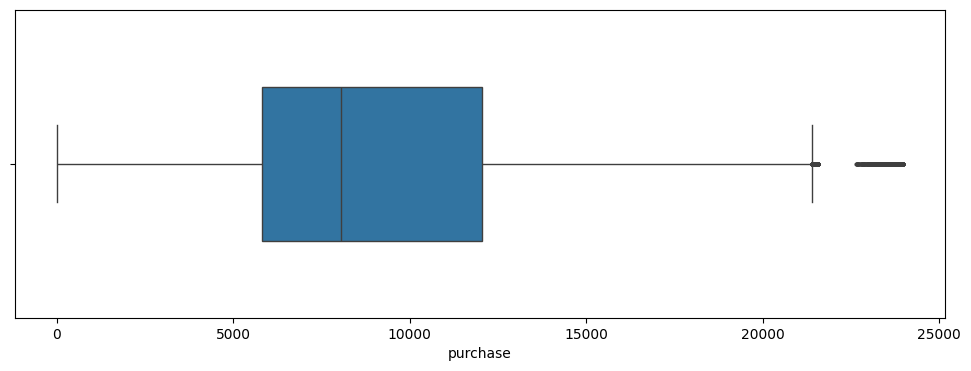

In [59]:
plt.figure(figsize=(12, 4))
sns.boxplot(data = walmart_df, x="purchase", fliersize = 2,width = 0.5,)
# plt.title("detching outliers in purchase")
plt.show()

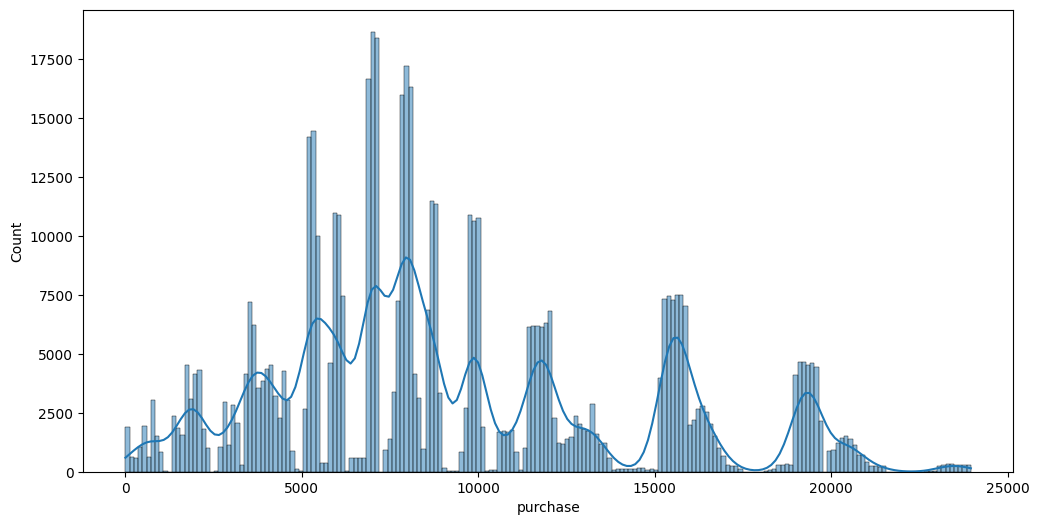

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(data= walmart_df, x="purchase", kde = True, bins = 200)
plt.show()

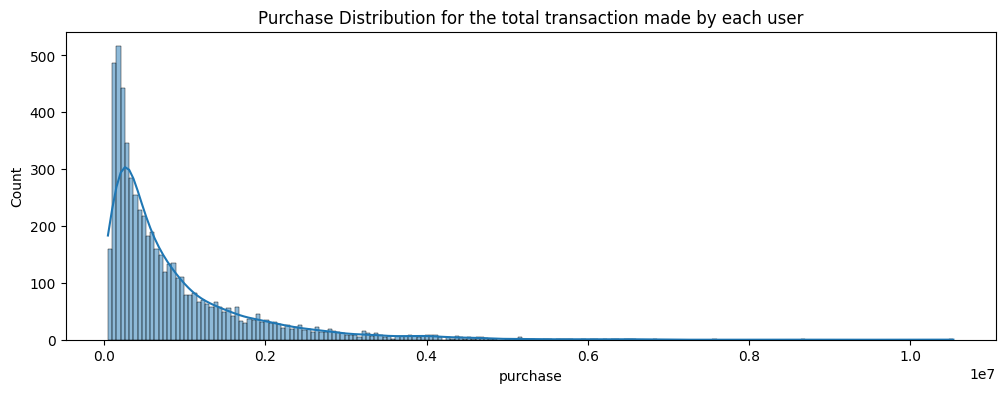

In [61]:
plt.figure(figsize=(12, 4))
plt.title('Purchase Distribution for the total transaction made by each user')
sns.histplot(data= walmart_df, x= walmart_df.groupby("user_id")["purchase"].sum(), kde = True, bins = 200)
plt.show()

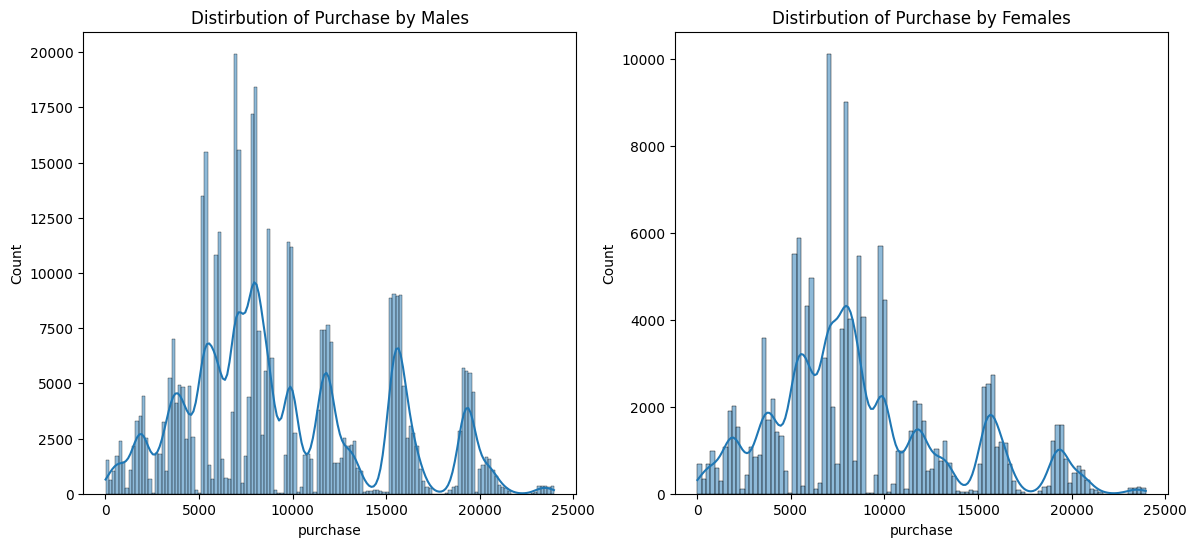

In [62]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=walmart_df[walmart_df["gender"] == "M"], x="purchase", kde=True)
plt.title("Distirbution of Purchase by Males")

plt.subplot(1, 2, 2)
sns.histplot(data=walmart_df[walmart_df["gender"] == "F"], x="purchase", kde=True)
plt.title("Distirbution of Purchase by Females")
plt.show()

In [63]:
gender_wise_customers = walmart_df.groupby(["gender", "user_id"])["purchase"].sum().reset_index()
gender_wise_customers

,gender,user_id,purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [64]:
females = gender_wise_customers[gender_wise_customers["gender"] == "F"]
males = gender_wise_customers[gender_wise_customers["gender"] == "M"]

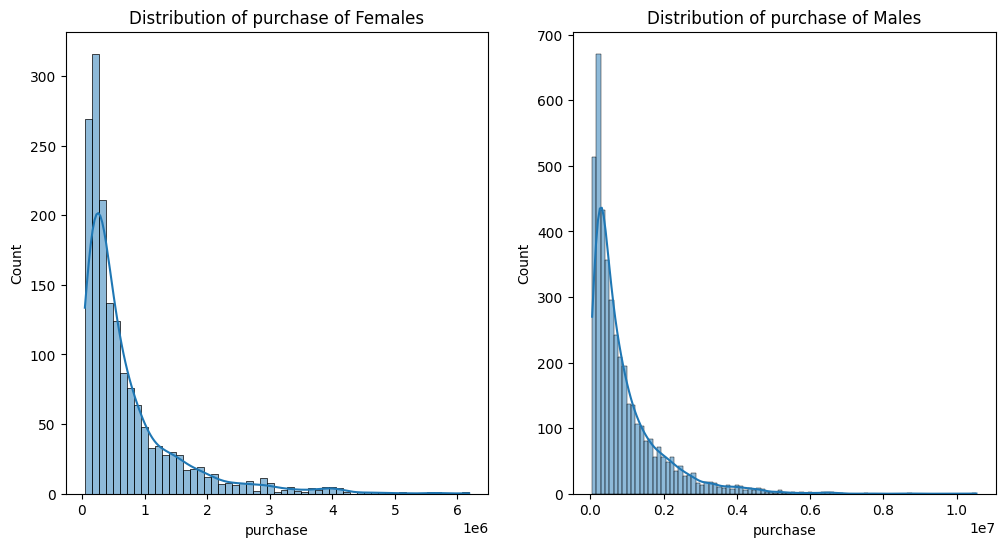

In [65]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=females, x="purchase", kde=True)
plt.title("Distribution of purchase of Females")

plt.subplot(1, 2, 2)
sns.histplot(data=males, x="purchase", kde=True)
plt.title("Distribution of purchase of Males")
plt.show()

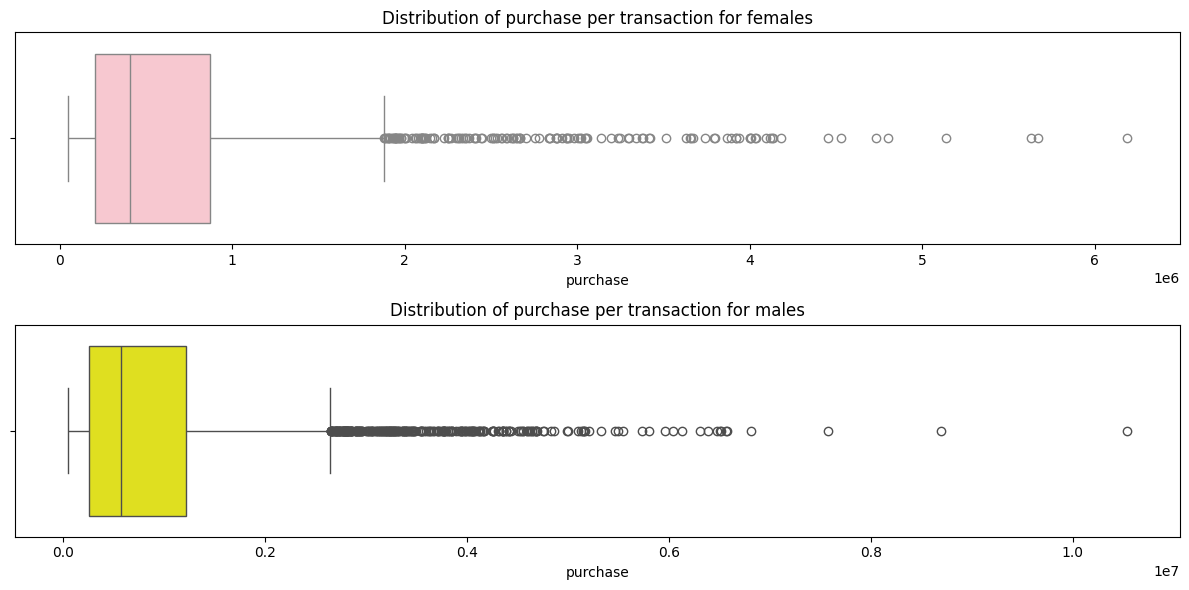

In [66]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.boxplot(data=females, x="purchase", color="pink")
plt.title('Distribution of purchase per transaction for females')


plt.subplot(2, 1, 2)
sns.boxplot(data=males, x="purchase", color="yellow")
plt.title('Distribution of purchase per transaction for males')

plt.tight_layout()
plt.show()

In [67]:
walmart_df.head(1)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,single,3,8370


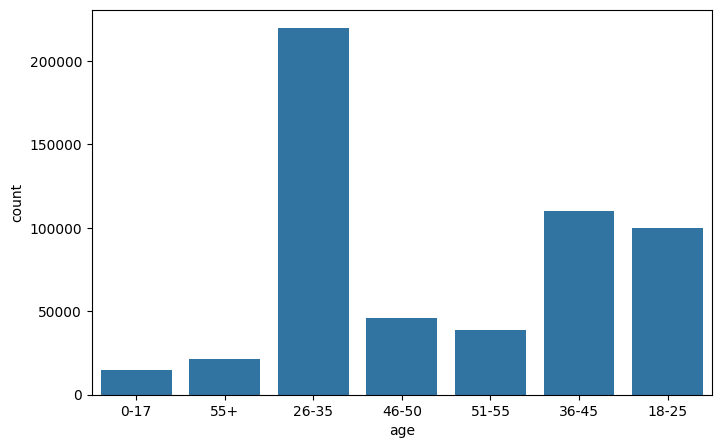

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(data=walmart_df, x="age")
# plt.yticks(np.arange(0, 200000, 25000))
plt.show()

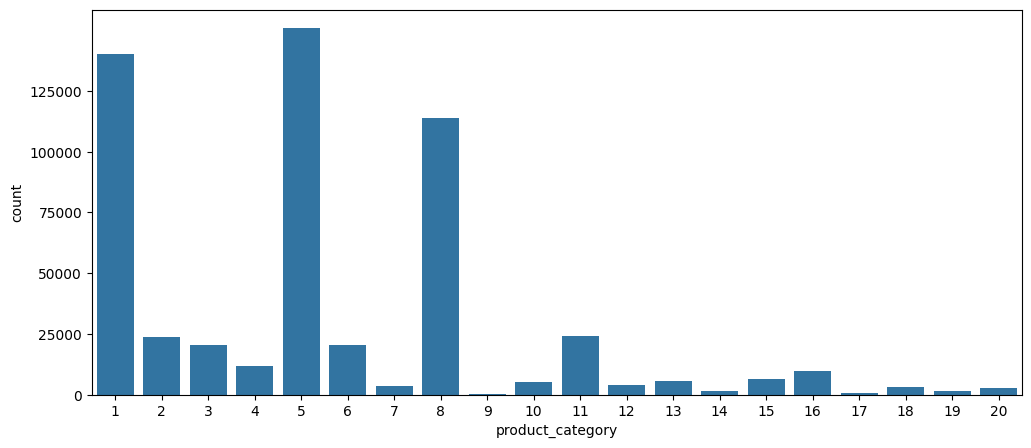

In [69]:
plt.figure(figsize=(12, 5))
sns.countplot(data=walmart_df, x="product_category")
plt.yticks(np.arange(0, 140000, 25000))
plt.show()

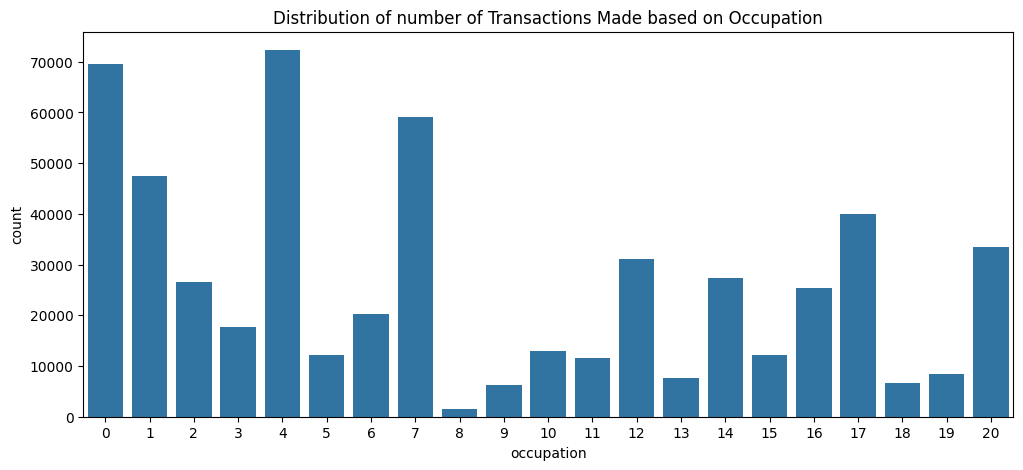

In [70]:
plt.figure(figsize=(12, 5))
plt.title('Distribution of number of Transactions Made based on Occupation')
sns.countplot(x="occupation", data=walmart_df)
plt.show()

#Bivariate Analysis


[]

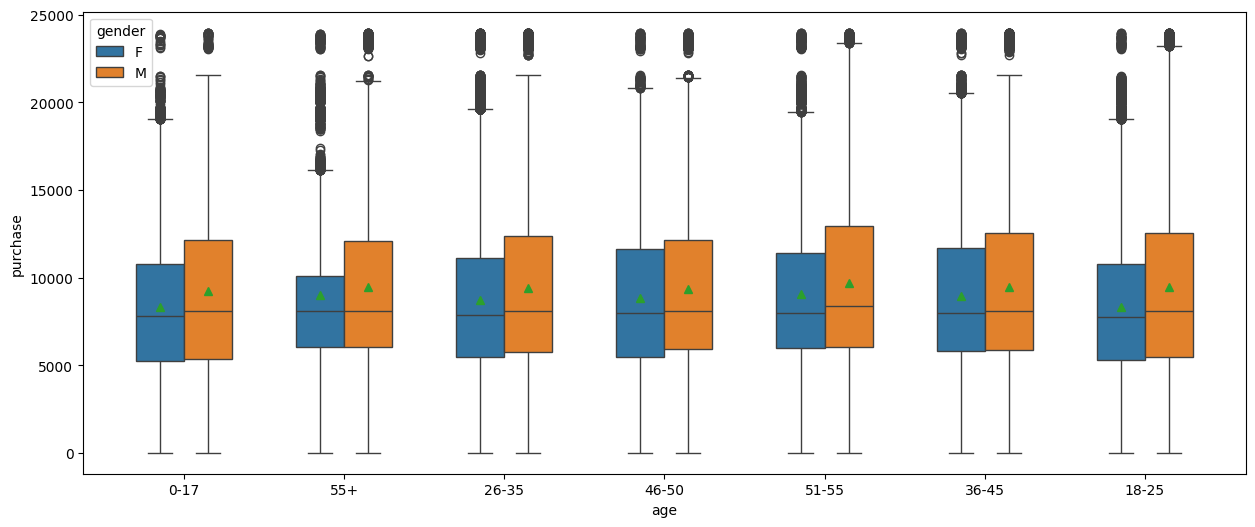

In [71]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = walmart_df, x = 'age', y = 'purchase', hue = 'gender', showmeans = True, width = 0.6)
plt.plot()

[]

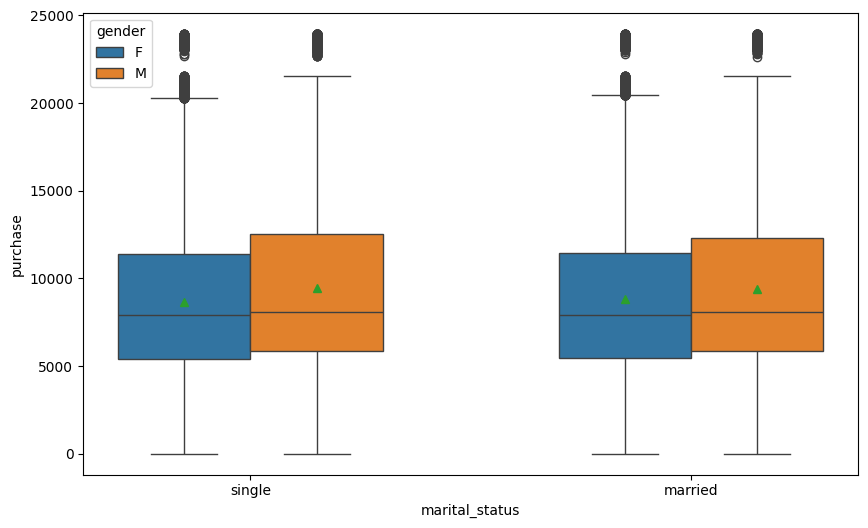

In [73]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = walmart_df, x = 'marital_status', y = 'purchase', hue = 'gender', showmeans = True, width = 0.6)
plt.plot()

[]

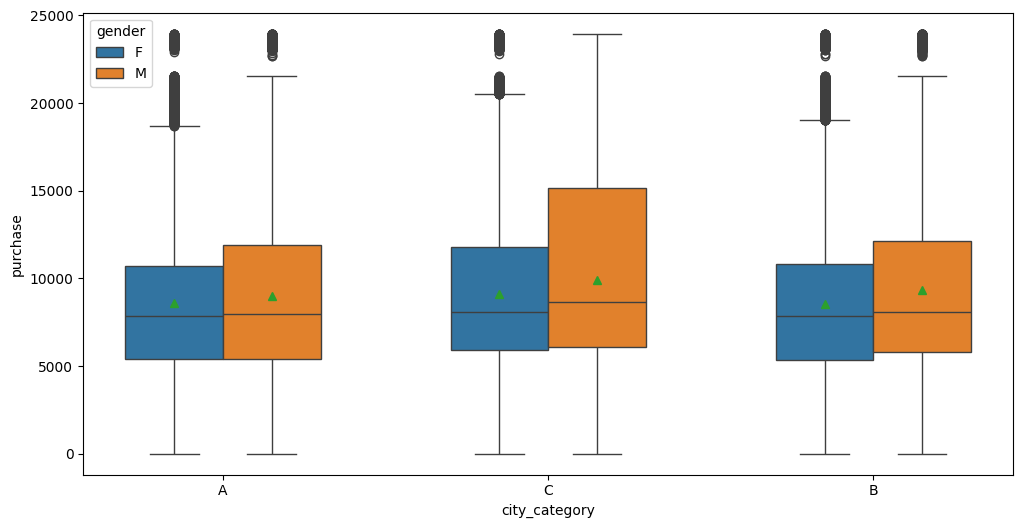

In [74]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = walmart_df, x = 'city_category', y = 'purchase', hue = 'gender', showmeans = True, width = 0.6)
plt.plot()

[]

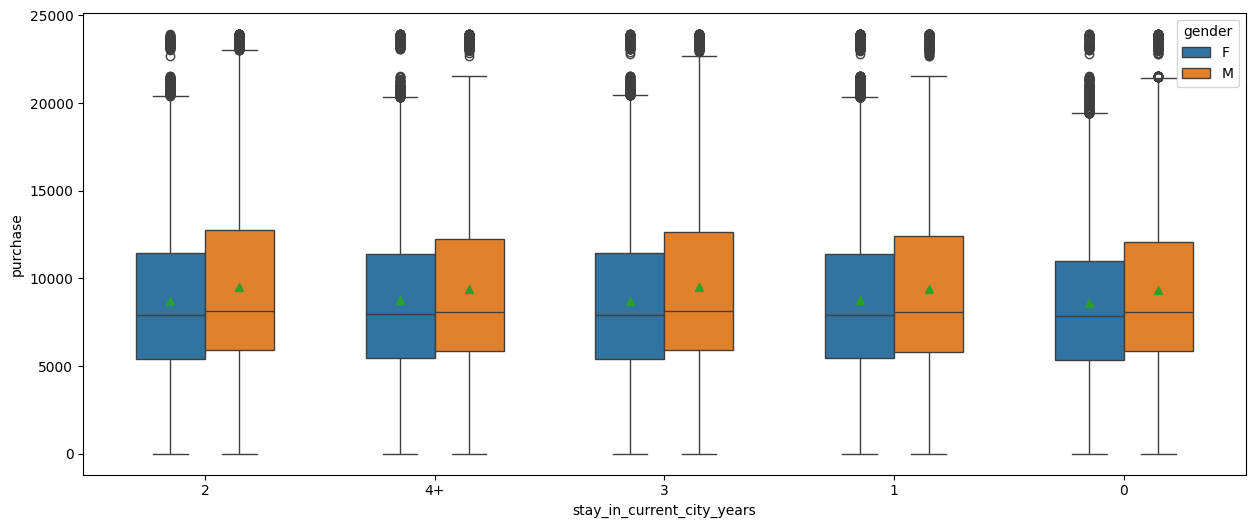

In [75]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = walmart_df, x = 'stay_in_current_city_years', y = 'purchase', hue = 'gender', showmeans = True, width = 0.6)
plt.plot()

In [149]:
gender_purchase_amount = walmart_df.groupby(["gender", "user_id"])["purchase"].sum().reset_index()
males_purchase_df = gender_purchase_amount[gender_purchase_amount['gender'] == "M"]
females_purchase_df = gender_purchase_amount[gender_purchase_amount['gender'] == "F"]

In [77]:
males_purchase_df

,gender,user_id,purchase
1666,M,1000002,810472
1667,M,1000003,341635
1668,M,1000004,206468
1669,M,1000005,821001
1670,M,1000007,234668
...,...,...,...
5886,M,1006030,737361
5887,M,1006032,517261
5888,M,1006033,501843
5889,M,1006034,197086


In [78]:
males_mean = []
for size in range(50, 4000):
  sample_mean = males_purchase_df["purchase"].sample(size).mean()
  males_mean.append(sample_mean)

[]

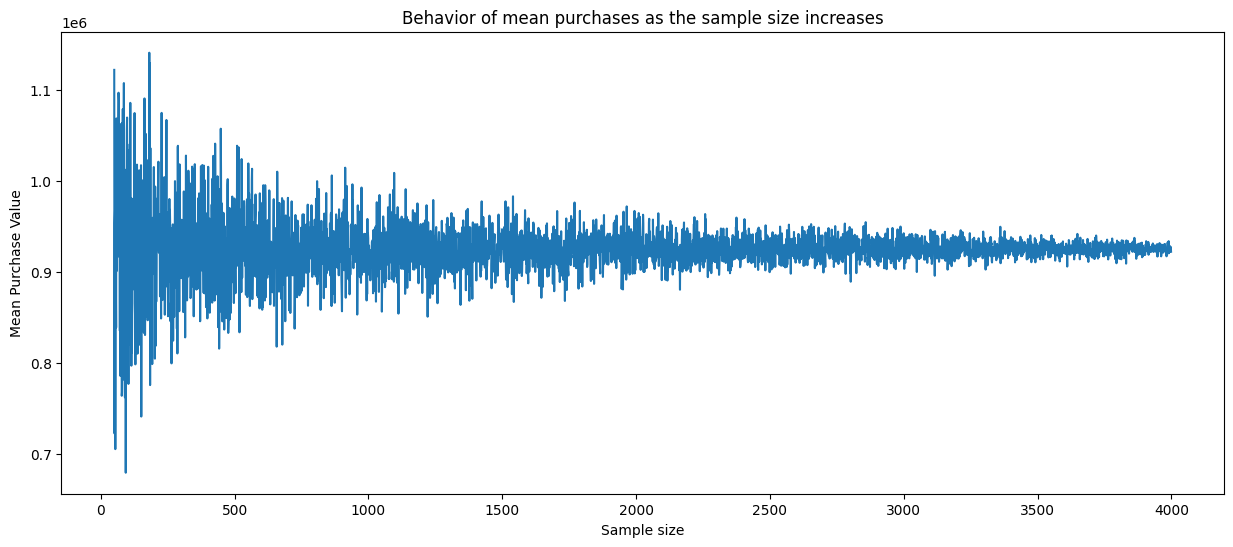

In [79]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 4000), males_mean)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

* It can be inferred from the above plot that as the sample size is small the deviations are fairly high.
* As the sample size increases, the deviation becomes smaller and smaller.
* The deviations will be small if the sample size taken is greater than 2000.

* Finding the confidence interval of each male's total spending on the Black Friday


In [80]:
means_male = []
size = males_purchase_df['purchase'].shape[0]
for bootstrapped_sample in range(10000):
 sample_mean = males_purchase_df['purchase'].sample(size, replace = True).mean()
 means_male.append(sample_mean)

[]

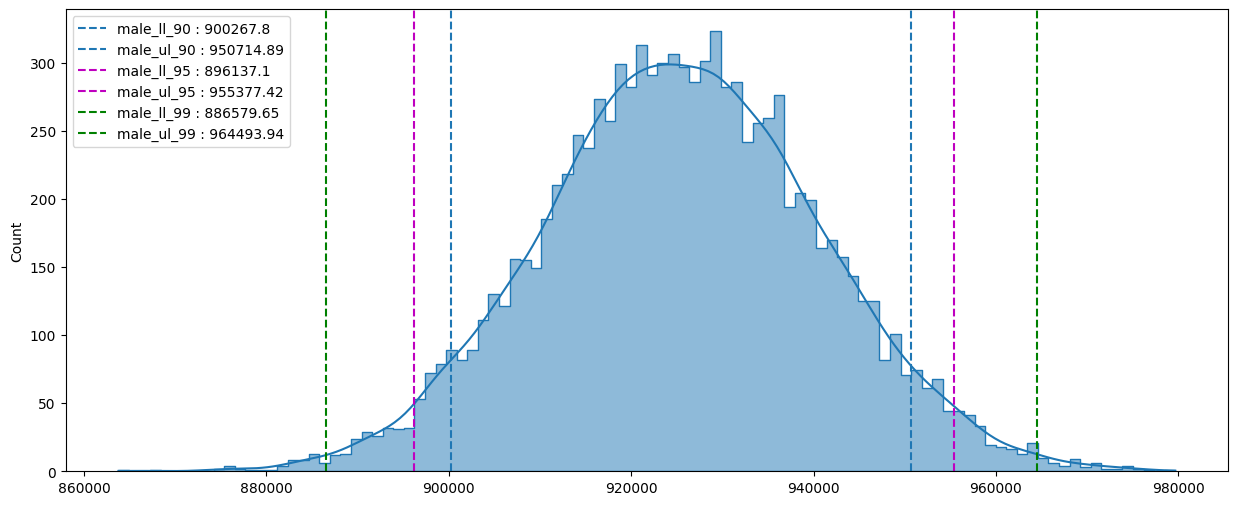

In [82]:
# The below code generates a histogram plot with kernel density estimation and
 # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level
plt.figure(figsize = (15, 6)) # setting the figure size of the plot
sns.histplot(means_male, kde = True, bins = 100, fill = True, element = 'step')
# Above line plots a histogram of the data contained in the `means_male` variable.
 # The `kde=True` argument adds a kernel density estimation line to the plot.
 # The `bins=100` argument sets the number of bins for the histogram

# Above line calculates the z-score corresponding to the 90% confidence level using the
 # inverse of the cumulative distribution function (CDF) of a standard normal distribution

male_ll_90 = np.percentile(means_male, 5)
 # calculating the lower limit of the 90% confidence interval
male_ul_90 = np.percentile(means_male, 95)
 # calculating the upper limit of the 90% confidence interval
plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--')
 # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--')
 # adding a vertical line at the upper limit of the 90% confidence interval

# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals,
 # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
male_ll_95 = np.percentile(means_male, 2.5)
male_ul_95 = np.percentile(means_male, 97.5)
plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')
male_ll_99 = np.percentile(means_male, 0.5)
male_ul_99 = np.percentile(means_male, 99.5)
plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'g')
plt.legend() # displaying a legend for the plotted lines.
plt.plot() # displaying the plot.


In [83]:
females_purchase_df

,gender,user_id,purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
1661,F,1006035,956645
1662,F,1006036,4116058
1663,F,1006037,1119538
1664,F,1006038,90034


In [150]:
females_mean = []
for size in range(50, 1600):
  sample_mean = females_purchase_df["purchase"].sample(size).mean()
  females_mean.append(sample_mean)

[]

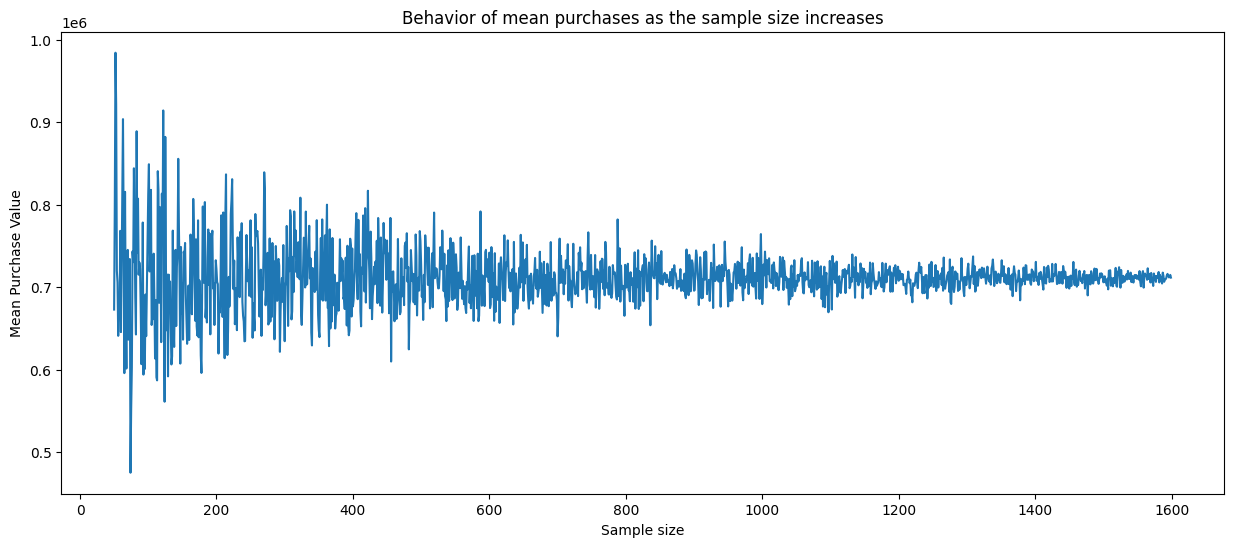

In [85]:
plt.figure(figsize = (15, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1600), females_mean)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

In [86]:
female_mean = []
size = males_purchase_df['purchase'].shape[0]
for bootstrapped_sample in range(10000):
 sample_mean = females_purchase_df['purchase'].sample(size, replace = True).mean()
 female_mean.append(sample_mean)

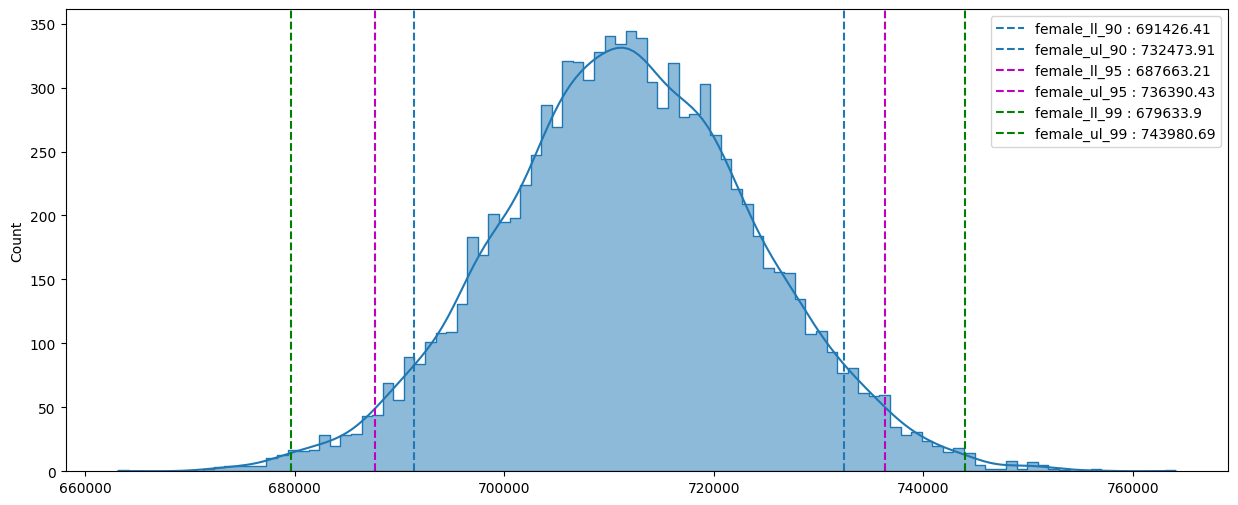

In [87]:
# The below code generates a histogram plot with kernel density estimation and
 # adds vertical lines to represent confidence intervals at 90%, 95%, and 99% level
plt.figure(figsize = (15, 6)) # setting the figure size of the plot
sns.histplot(female_mean, kde = True, bins = 100, fill = True, element = 'step')
# Above line plots a histogram of the data contained in the `means_male` variable.
 # The `kde=True` argument adds a kernel density estimation line to the plot.
 # The `bins=100` argument sets the number of bins for the histogram

# Above line calculates the z-score corresponding to the 90% confidence level using the
 # inverse of the cumulative distribution function (CDF) of a standard normal distribution

female_ll_90 = np.percentile(female_mean, 5)
 # calculating the lower limit of the 90% confidence interval
female_ul_90 = np.percentile(female_mean, 95)
 # calculating the upper limit of the 90% confidence interval
plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--')
 # adding a vertical line at the lower limit of the 90% confidence interval
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--')
 # adding a vertical line at the upper limit of the 90% confidence interval

# Similar steps are repeated for calculating and plotting the 95% and 99% confidence intervals,
 # with different line colors (`color='m'` for 95% and `color='g'` for 99%)
female_ll_95 = np.percentile(female_mean, 2.5)
female_ul_95 = np.percentile(female_mean, 97.5)
plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'm')
female_ll_99 = np.percentile(female_mean, 0.5)
female_ul_99 = np.percentile(female_mean, 99.5)
plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'g')

plt.legend()
plt.show()

[]

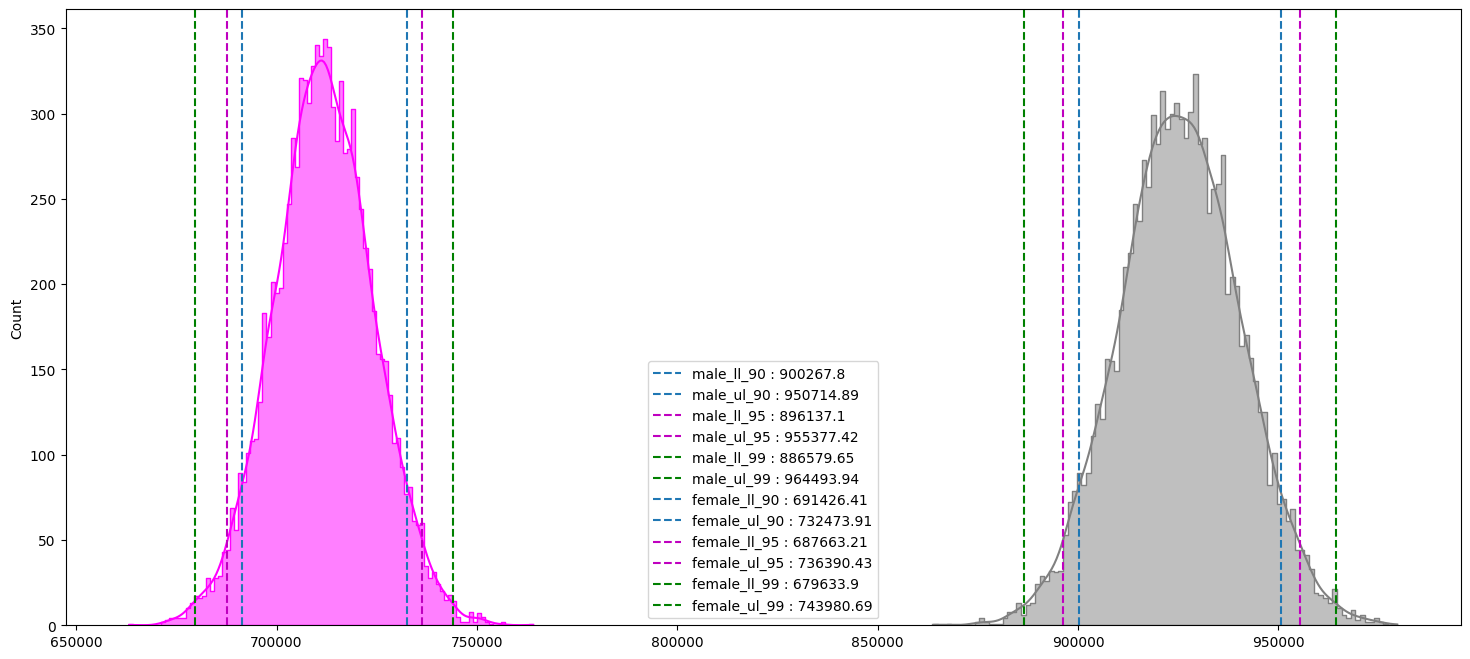

In [88]:
plt.figure(figsize = (18, 8))
# The first histogram represents the distribution of means_male with gray color having
 # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(means_male,
 kde = True,
 bins = 100,
 fill = True,
 element = 'step',
 color = 'gray',
 legend = True)
# Multiple vertical lines are plotted to represent the lower and upper limits
 # for confidence intervals at different confidence levels
plt.axvline(male_ll_90, label = f'male_ll_90 : {round(male_ll_90, 2)}', linestyle = '--')
plt.axvline(male_ul_90, label = f'male_ul_90 : {round(male_ul_90, 2)}', linestyle = '--')
plt.axvline(male_ll_95, label = f'male_ll_95 : {round(male_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ul_95, label = f'male_ul_95 : {round(male_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(male_ll_99, label = f'male_ll_99 : {round(male_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(male_ul_99, label = f'male_ul_99 : {round(male_ul_99, 2)}', linestyle = '--', color = 'g')
# The second histogram represents the distribution of means_female with magenta color
 # KDE (Kernel Density Estimation) curves enabled for smooth representation.
sns.histplot(female_mean,
 kde = True,
 bins = 100,
 fill = True,
 element = 'step',
 color = 'magenta',
 legend = True)
# Multiple vertical lines are plotted to represent the lower and upper limits
 # for confidence intervals at different confidence levels
plt.axvline(female_ll_90, label = f'female_ll_90 : {round(female_ll_90, 2)}', linestyle = '--')
plt.axvline(female_ul_90, label = f'female_ul_90 : {round(female_ul_90, 2)}', linestyle = '--')
plt.axvline(female_ll_95, label = f'female_ll_95 : {round(female_ll_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ul_95, label = f'female_ul_95 : {round(female_ul_95, 2)}', linestyle = '--', color = 'm')
plt.axvline(female_ll_99, label = f'female_ll_99 : {round(female_ll_99, 2)}', linestyle = '--', color = 'g')
plt.axvline(female_ul_99, label = f'female_ul_99 : {round(female_ul_99, 2)}', linestyle = '--', color = 'g')
plt.legend()
plt.plot()


* **Determining the mean purchase made by each user belonging to different Marital Status**

In [89]:
df_single = walmart_df.loc[walmart_df['marital_status'] == 'single'].reset_index()
df_married = walmart_df.loc[walmart_df['marital_status'] == 'married']

In [151]:
df_single = df_single.groupby('user_id')['purchase'].sum().reset_index()
df_single

,user_id,purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000006,379930
4,1000009,594099
...,...,...
3412,1006034,197086
3413,1006035,956645
3414,1006037,1119538
3415,1006038,90034


In [152]:
mean_purchase = []
for sample in range(50, 3000):
  samples = df_single["purchase"].sample(sample).mean()
  mean_purchase.append(samples)

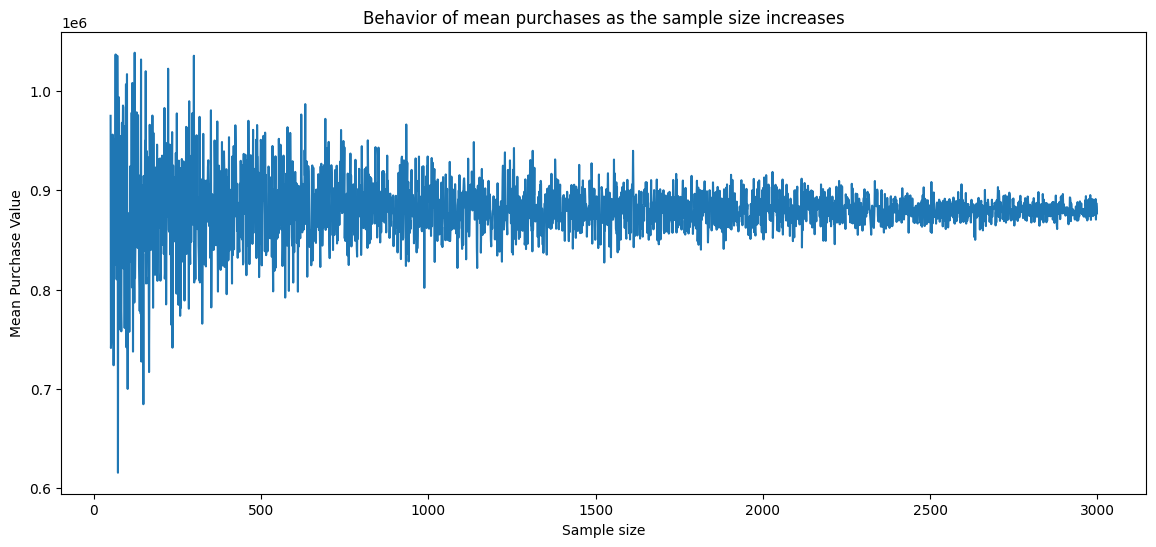

In [92]:
plt.figure(figsize=(14, 6))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 3000), mean_purchase)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()

In [93]:
single_means = []
size = df_single['purchase'].shape[0]
for bootstrapped_sample in range(10000):
 sample_mean = df_single['purchase'].sample(size, replace = True).mean()
 single_means.append(sample_mean)

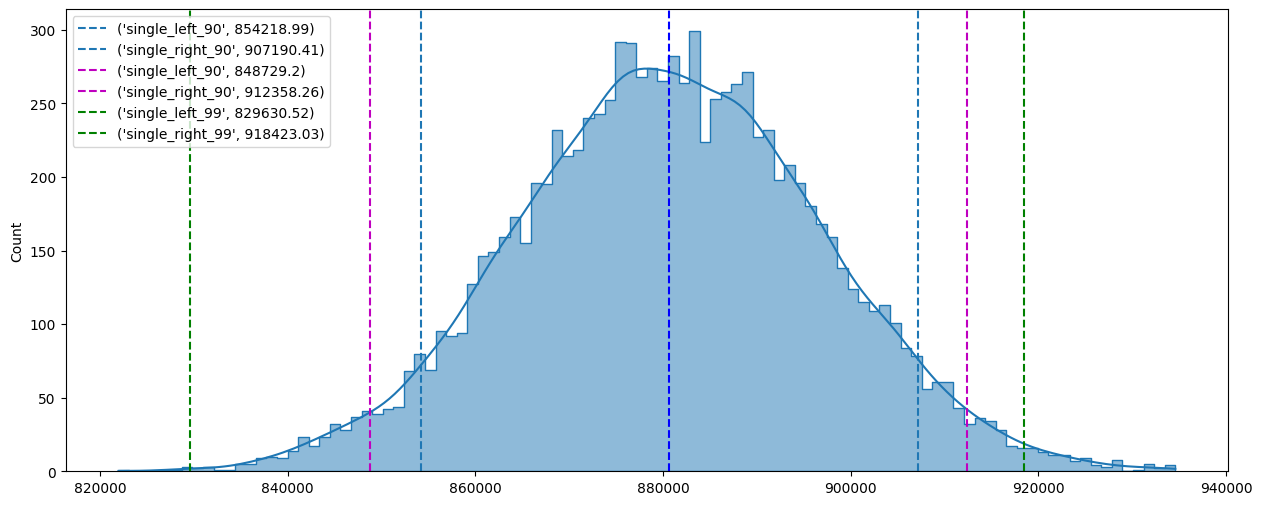

In [94]:
plt.figure(figsize=(15, 6))
sns.histplot(data=single_means, kde=True, bins=100, fill=True, element="step")
single_left_90 = np.percentile(single_means, 5).round(2)
single_right_90 = np.percentile(single_means, 95).round(2)
plt.axvline(single_left_90, label=("single_left_90", single_left_90), linestyle= "--")
plt.axvline(single_right_90, label=("single_right_90", single_right_90), linestyle= "--")

#95% confidence interval
single_left_95 = np.percentile(single_means, 2.5).round(2)
single_right_95 = np.percentile(single_means, 97.5).round(2)
plt.axvline(single_left_95, label=("single_left_90", single_left_95), linestyle= "--", color="m")
plt.axvline(single_right_95, label=("single_right_90", single_right_95), linestyle= "--", color="m")

#99% confidence interval
single_left_99 = np.percentile(single_means, 0.05).round(2)
single_right_99 = np.percentile(single_means, 99).round(2)
plt.axvline(single_left_99, label=("single_left_99", single_left_99), linestyle= "--", color="g")
plt.axvline(single_right_99, label=("single_right_99", single_right_99), linestyle= "--", color="g")
plt.axvline(np.percentile(single_means, 50), linestyle="--", color="b")
plt.legend()
plt.show()

In [95]:
df_married = df_married.groupby(["marital_status", "user_id"])["purchase"].sum().reset_index()
df_married

,marital_status,user_id,purchase
0,married,1000004,206468
1,married,1000005,821001
2,married,1000007,234668
3,married,1000008,796593
4,married,1000010,2169510
...,...,...,...
2469,married,1006029,157436
2470,married,1006030,737361
2471,married,1006033,501843
2472,married,1006036,4116058


In [153]:
married_mean = []
for sample in range(50, 2000):
  samples = df_married["purchase"].sample(sample).mean()
  married_mean.append(samples)

[]

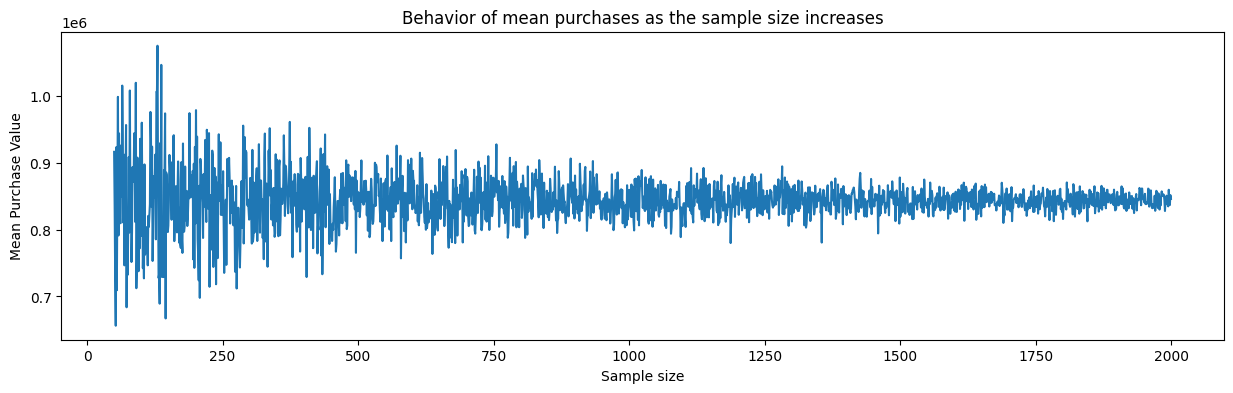

In [97]:
plt.figure(figsize=(15, 4))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 2000), married_mean)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.plot()

In [154]:
married_means = []
df_married["purchase"].shape[0]
for bootstrapped_sample in range(10000):
 sample_mean = df_married['purchase'].sample(size, replace = True).mean()
 married_means.append(sample_mean)

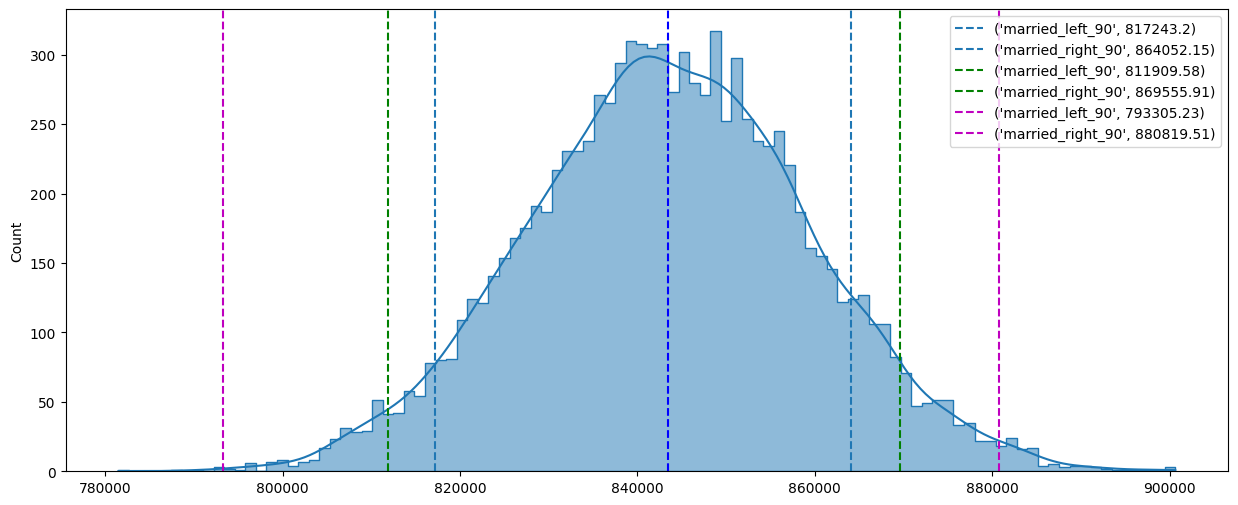

In [99]:
plt.figure(figsize=(15,6))
sns.histplot(data=married_means, kde=True, bins=100, element="step", fill=True)

#90% confidence interval
married_left_90 = np.percentile(married_means, 5).round(2)
married_right_90 = np.percentile(married_means, 90).round(2)
plt.axvline(married_left_90, label =("married_left_90", married_left_90), linestyle="--")
plt.axvline(married_right_90, label =("married_right_90", married_right_90), linestyle="--")

#95% confidence interval
married_left_95 = np.percentile(married_means, 2.5).round(2)
married_right_95 = np.percentile(married_means, 95).round(2)
plt.axvline(married_left_95, label =("married_left_90", married_left_95), linestyle="--", color="g")
plt.axvline(married_right_95, label =("married_right_90", married_right_95), linestyle="--", color="g")

#99% confidence interval
married_left_99 = np.percentile(married_means, 0.05).round(2)
married_right_99 = np.percentile(married_means, 99).round(2)
plt.axvline(married_left_99, label =("married_left_90", married_left_99), linestyle="--", color="m")
plt.axvline(married_right_99, label =("married_right_90", married_right_99), linestyle="--",color="m")
plt.axvline(np.percentile(married_means, 50).round(2), linestyle="--", color="b")
plt.legend()
plt.show()

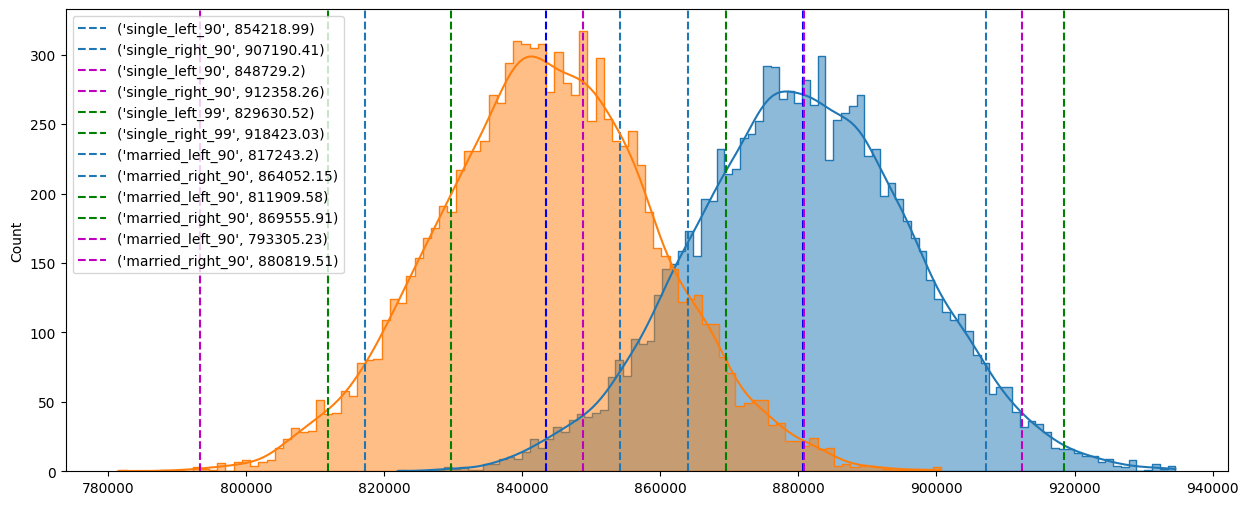

In [100]:
plt.figure(figsize=(15, 6))

sns.histplot(data=single_means, kde=True, bins=100, fill=True, element="step")

plt.axvline(single_left_90, label=("single_left_90", single_left_90), linestyle= "--")
plt.axvline(single_right_90, label=("single_right_90", single_right_90), linestyle= "--")
plt.axvline(single_left_95, label=("single_left_90", single_left_95), linestyle= "--", color="m")
plt.axvline(single_right_95, label=("single_right_90", single_right_95), linestyle= "--", color="m")
plt.axvline(single_left_99, label=("single_left_99", single_left_99), linestyle= "--", color="g")
plt.axvline(single_right_99, label=("single_right_99", single_right_99), linestyle= "--", color="g")
plt.axvline(np.percentile(single_means, 50), linestyle="--", color="b")


#married_plot
sns.histplot(data=married_means, kde=True, bins=100, element="step", fill=True)
plt.axvline(married_left_90, label =("married_left_90", married_left_90), linestyle="--")
plt.axvline(married_right_90, label =("married_right_90", married_right_90), linestyle="--")
plt.axvline(married_left_95, label =("married_left_90", married_left_95), linestyle="--", color="g")
plt.axvline(married_right_95, label =("married_right_90", married_right_95), linestyle="--", color="g")
plt.axvline(married_left_99, label =("married_left_90", married_left_99), linestyle="--", color="m")
plt.axvline(married_right_99, label =("married_right_90", married_right_99), linestyle="--",color="m")
plt.axvline(np.percentile(married_means, 50).round(2), linestyle="--", color="b")



plt.legend()
plt.show()

It can be inferred from the above chart that the distributions of singles' total spending and married individuals' total spending overlap. It
suggests that there is no significant difference in spending habits between these two groups. Here are some possible inferences that can
be drawn from this:
- Relationship status does not strongly influence spending: Being single or married does not appear to have a substantial impact on
individuals' spending patterns. Other factors such as income, personal preferences, and financial priorities may play a more significant
role in determining spending habits.
- Similar consumption patterns: Singles and married individuals may have similar lifestyles and consumption patterns, leading to
comparable spending behaviors. They may allocate their income in comparable ways, making similar purchasing decisions and
spending on similar categories of products or services.
- Financial considerations: Both singles and married individuals may have similar financial responsibilities and constraints, leading to
similar spending levels. They may have similar obligations such as housing costs, bills, and other financial commitments, which
influence their overall spending capacity.
- Individual differences outweigh relationship status: Other individual characteristics, such as personal values, interests, and
financial habits, may have a more significant impact on spending behavior than relationship status. These factors can vary widely
within each group, resulting in overlapping spending distributions

In [101]:
def cal_percetiles(x):

  #90 confidence interval
  left_90 = np.percentile(x, 5).round(2)
  right_90 = np.percentile(x, 90).round(2)

  #95% confidence interval
  left_95 = np.percentile(x, 2.5).round(2)
  right_95 = np.percentile(x, 95).round(2)

  #99% condifence interval
  left_99 = np.percentile(x, 0.05).round(2)
  right_99 = np.percentile(x, 99).round(2)

  #median
  mean_50 = np.percentile(x, 50).round(2)
  return left_90, right_90,left_95,right_95, left_99,right_99, mean_50


In [102]:
unique_ag = walmart_df["age"].unique()

age_df = {}
for age in unique_ag:
  age_df[f"age_{age}"] = walmart_df[walmart_df["age"] == age]

In [103]:
unique_ag

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [104]:
print(len(age_df['age_0-17']))
print(len(age_df['age_18-25']))
print(len(age_df['age_26-35']))
print(len(age_df['age_36-45']))
print(len(age_df['age_46-50']))
print(len(age_df['age_51-55']))
print(len(age_df['age_55+']))

15102
99660
219587
110013
45701
38501
21504


In [105]:
age_0_to_17 = age_df['age_0-17'].groupby(["age",'user_id'])["purchase"].sum().reset_index()
age_55_plus =age_df['age_55+'].groupby(["age",'user_id'])["purchase"].sum().reset_index()
age_26_to_35 = age_df['age_26-35'].groupby(["age",'user_id'])["purchase"].sum().reset_index()
age_46_to_50 = age_df['age_46-50'].groupby(["age",'user_id'])["purchase"].sum().reset_index()
age_51_to_55 = age_df['age_51-55'].groupby(["age",'user_id'])["purchase"].sum().reset_index()
age_36_to_45 = age_df['age_36-45'].groupby(["age",'user_id'])["purchase"].sum().reset_index()
age_18_to_25 = age_df['age_18-25'].groupby(["age",'user_id'])["purchase"].sum().reset_index()

**For Age Group 0 - 17 years**




In [106]:
age_0_to_17

,age,user_id,purchase
0,0-17,1000001,334093
1,0-17,1000019,1458069
2,0-17,1000051,200772
3,0-17,1000075,1035584
4,0-17,1000086,294063
...,...,...,...
213,0-17,1005844,476231
214,0-17,1005953,629161
215,0-17,1005973,270475
216,0-17,1005989,466195


In [107]:
mean_purchases = []
for sample_size in range(50, 200):
 sample_mean = age_0_to_17['purchase'].sample(sample_size).mean()
 mean_purchases.append(sample_mean)

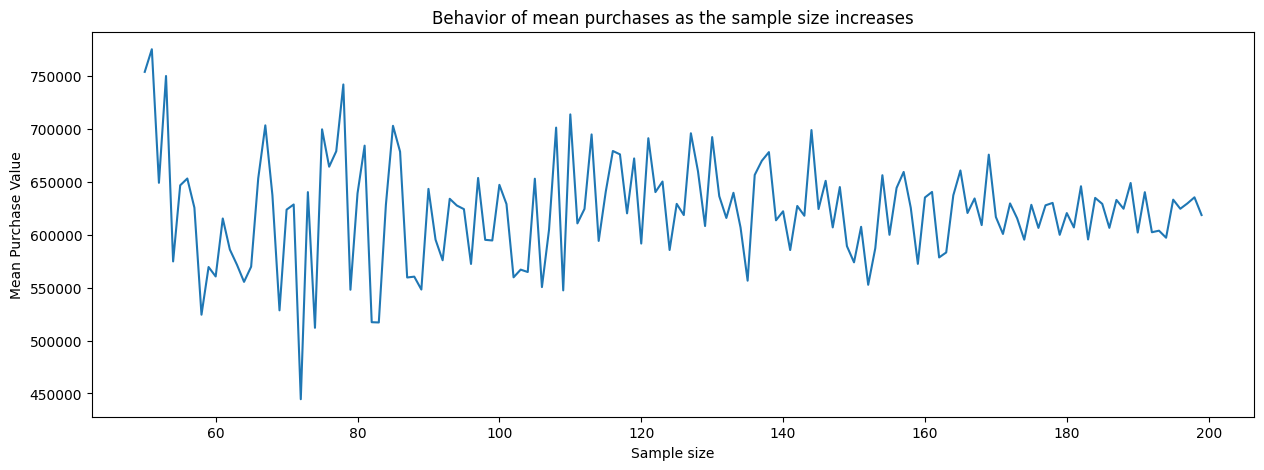

In [108]:
plt.figure(figsize=(15, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 200), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()

- Finding the confidence interval of total spending for each individual in the age group 0 - 17 on the Black Friday


In [155]:
age_18_means= []
size = age_0_to_17['purchase'].shape[0]
for sample in range(1000):
  sample_mean = age_0_to_17['purchase'].sample(size, replace=True).mean()
  age_18_means.append(sample_mean)

In [110]:
a, b , c, d, e, f, g = cal_percetiles(age_18_means)

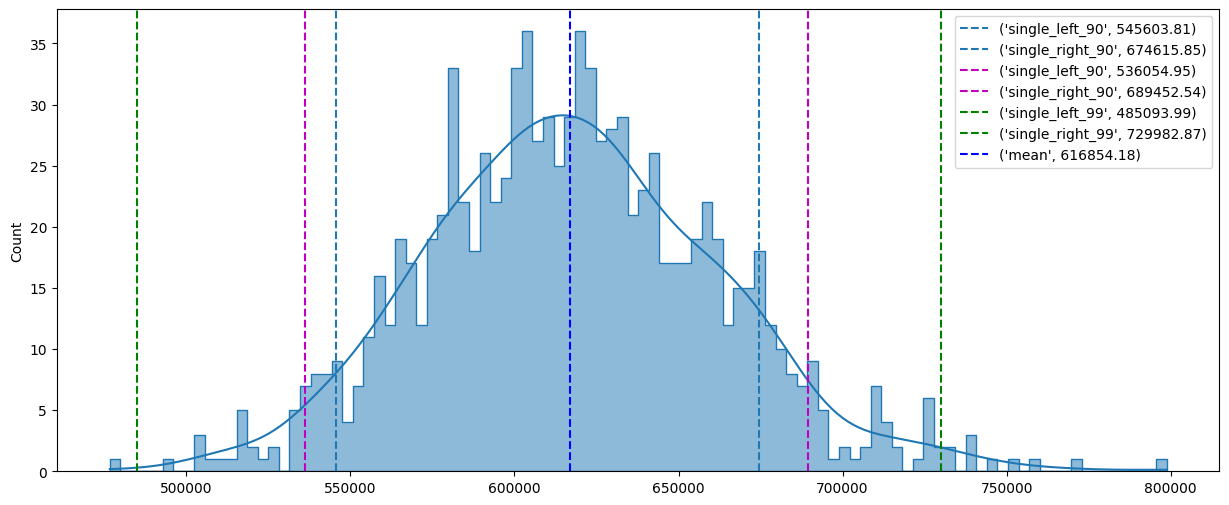

In [111]:
plt.figure(figsize=(15, 6))
sns.histplot(data=age_18_means, kde=True, fill=True, element="step", bins= 100)
# a = np.percentile(age_18_means, 5)
plt.axvline(a, label=("single_left_90",a ), linestyle= "--")
plt.axvline(b, label=("single_right_90", b), linestyle= "--")
plt.axvline(c, label=("single_left_90", c), linestyle= "--", color="m")
plt.axvline(d, label=("single_right_90", d), linestyle= "--", color="m")
plt.axvline(e, label=("single_left_99", e), linestyle= "--", color="g")
plt.axvline(f, label=("single_right_99", f), linestyle= "--", color="g")
plt.axvline(g, label= ("mean",g), linestyle="--", color="b")

plt.legend()
plt.show()

**age_18_25_means**

In [112]:
age_18_to_25

,age,user_id,purchase
0,18-25,1000018,1979047
1,18-25,1000021,127099
2,18-25,1000022,1279914
3,18-25,1000025,534706
4,18-25,1000034,807983
...,...,...,...
1064,18-25,1005998,702901
1065,18-25,1006008,266306
1066,18-25,1006027,265201
1067,18-25,1006028,362972


In [113]:
mean_purchases = []
for sample_size in range(50, 1000):
 sample_mean = age_18_to_25['purchase'].sample(sample_size).mean()
 mean_purchases.append(sample_mean)

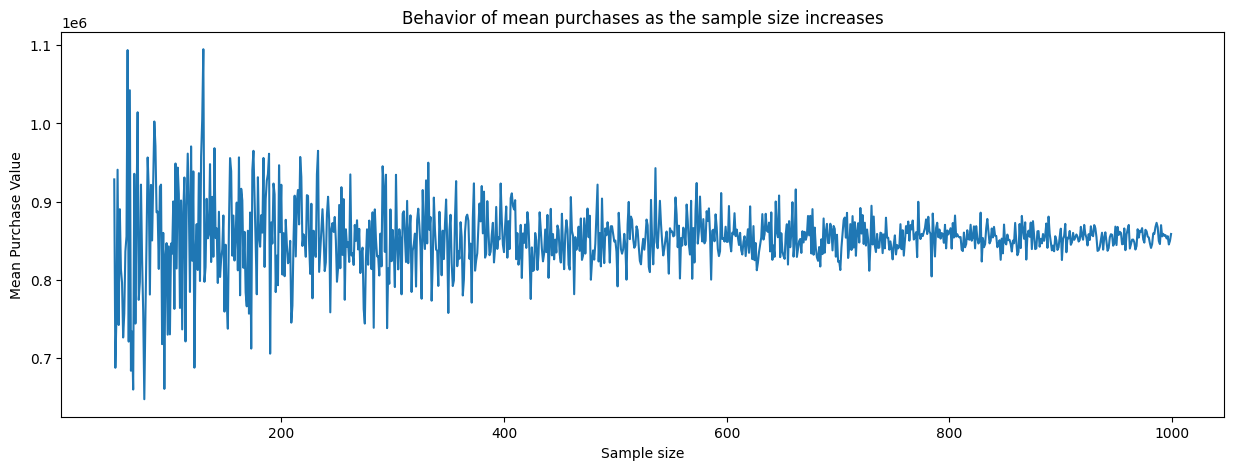

In [114]:
plt.figure(figsize=(15, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1000), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()

In [156]:
age_18_25_means= []
size = age_0_to_17['purchase'].shape[0]
for sample in range(1000):
  sample_mean = age_18_to_25['purchase'].sample(size, replace=True).mean()
  age_18_25_means.append(sample_mean)

In [116]:
a, b , c, d, e, f, g = cal_percetiles(age_18_25_means)

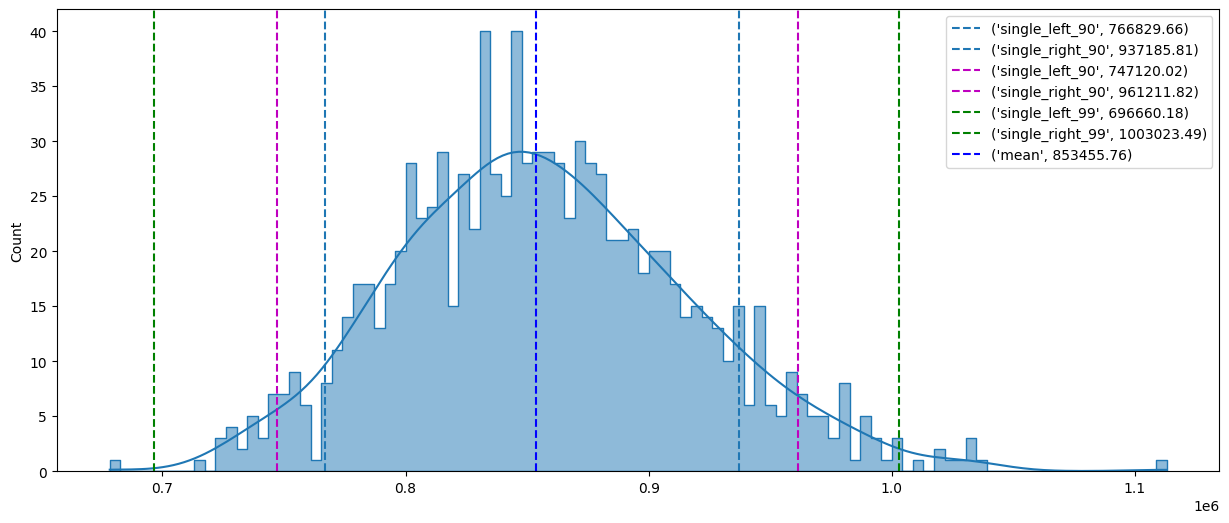

In [117]:
plt.figure(figsize=(15, 6))
sns.histplot(data=age_18_25_means, kde=True, fill=True, element="step", bins= 100)
# a = np.percentile(age_18_means, 5)
plt.axvline(a, label=("single_left_90",a ), linestyle= "--")
plt.axvline(b, label=("single_right_90", b), linestyle= "--")
plt.axvline(c, label=("single_left_90", c), linestyle= "--", color="m")
plt.axvline(d, label=("single_right_90", d), linestyle= "--", color="m")
plt.axvline(e, label=("single_left_99", e), linestyle= "--", color="g")
plt.axvline(f, label=("single_right_99", f), linestyle= "--", color="g")
plt.axvline(g, label= ("mean",g), linestyle="--", color="b")

plt.legend()
plt.show()

In [118]:
age_26_to_35

,age,user_id,purchase
0,26-35,1000003,341635
1,26-35,1000005,821001
2,26-35,1000008,796593
3,26-35,1000009,594099
4,26-35,1000011,557023
...,...,...,...
2048,26-35,1006030,737361
2049,26-35,1006034,197086
2050,26-35,1006035,956645
2051,26-35,1006036,4116058


In [157]:
mean_purchases = []
for sample_size in range(50, 200):
 sample_mean = age_26_to_35['purchase'].sample(sample_size).mean()
 mean_purchases.append(sample_mean)

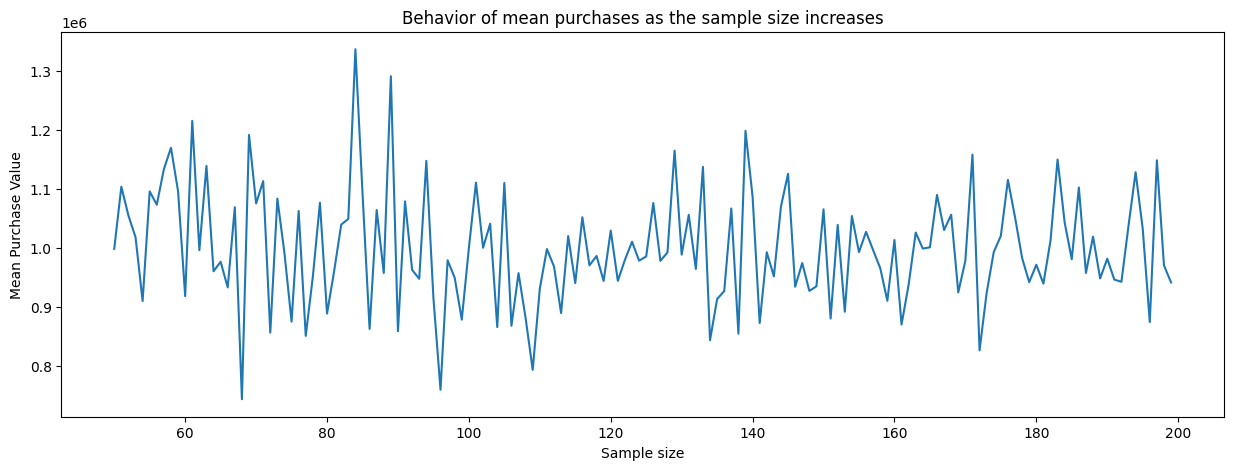

In [120]:
plt.figure(figsize=(15, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 200), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()

In [121]:
age_means= []
size = age_26_to_35['purchase'].shape[0]
for sample in range(1000):
  sample_mean = age_26_to_35['purchase'].sample(size, replace=True).mean()
  age_means.append(sample_mean)


In [122]:
a, b , c, d, e, f, g = cal_percetiles(age_means)

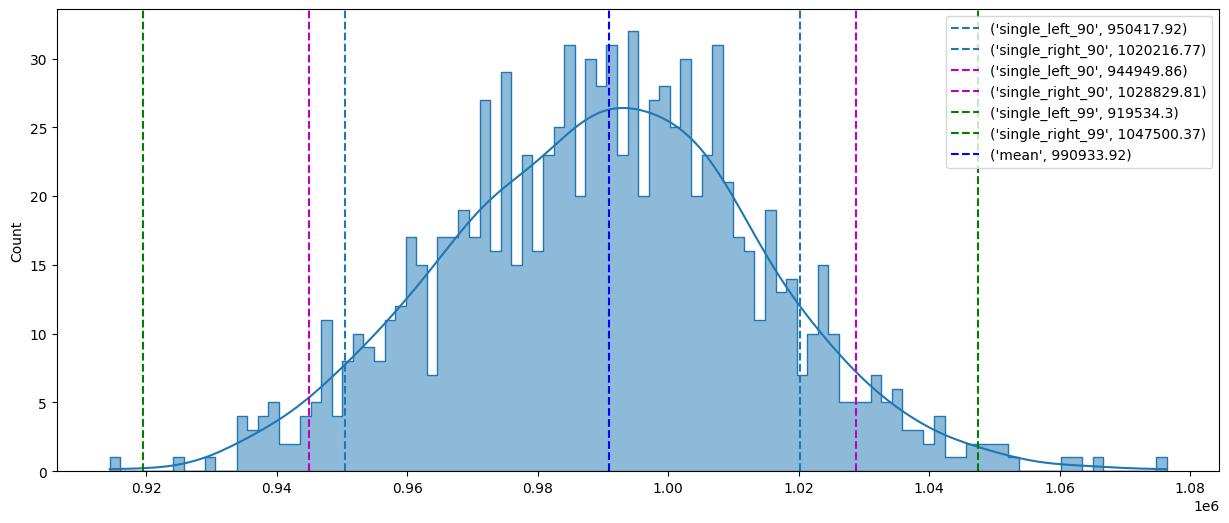

In [123]:
plt.figure(figsize=(15, 6))
sns.histplot(data=age_means, kde=True, fill=True, element="step", bins= 100)
# a = np.percentile(age_18_means, 5)
plt.axvline(a, label=("single_left_90",a ), linestyle= "--")
plt.axvline(b, label=("single_right_90", b), linestyle= "--")
plt.axvline(c, label=("single_left_90", c), linestyle= "--", color="m")
plt.axvline(d, label=("single_right_90", d), linestyle= "--", color="m")
plt.axvline(e, label=("single_left_99", e), linestyle= "--", color="g")
plt.axvline(f, label=("single_right_99", f), linestyle= "--", color="g")
plt.axvline(g, label= ("mean",g), linestyle="--", color="b")

plt.legend()
plt.show()

**age_36_to_45**

In [124]:
age_36_to_45

,age,user_id,purchase
0,36-45,1000007,234668
1,36-45,1000010,2169510
2,36-45,1000014,127629
3,36-45,1000016,150490
4,36-45,1000023,1670998
...,...,...,...
1162,36-45,1006011,1198714
1163,36-45,1006012,127920
1164,36-45,1006017,160230
1165,36-45,1006018,975585


In [158]:
mean_purchases = []
for sample_size in range(50, 1100):
 sample_mean = age_36_to_45['purchase'].sample(sample_size).mean()
 mean_purchases.append(sample_mean)

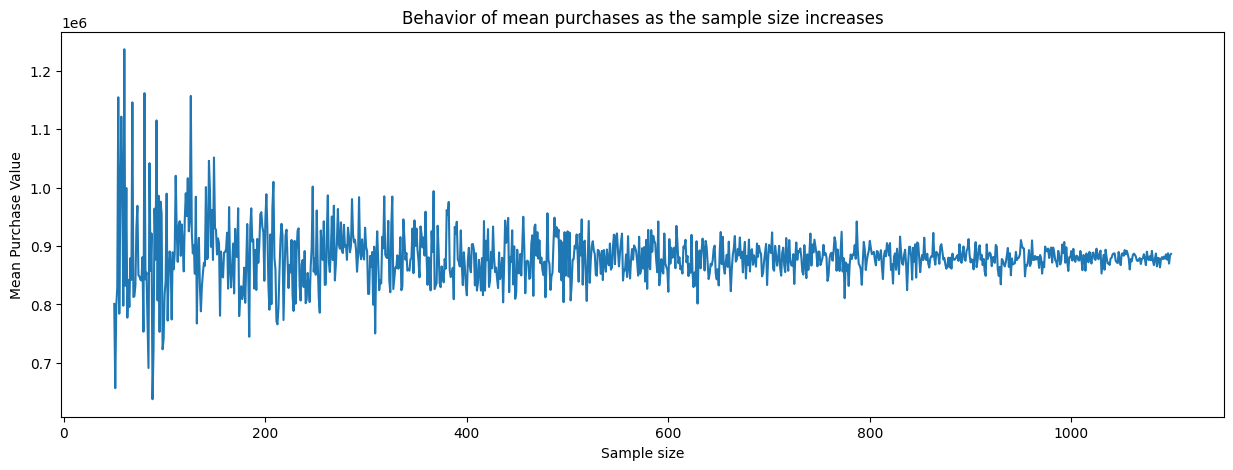

In [126]:
plt.figure(figsize=(15, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 1100), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()

In [127]:
age_means= []
size = age_36_to_45['purchase'].shape[0]
for sample in range(1000):
  sample_mean = age_36_to_45['purchase'].sample(size, replace=True).mean()
  age_means.append(sample_mean)

In [128]:
a, b , c, d, e, f, g = cal_percetiles(age_means)

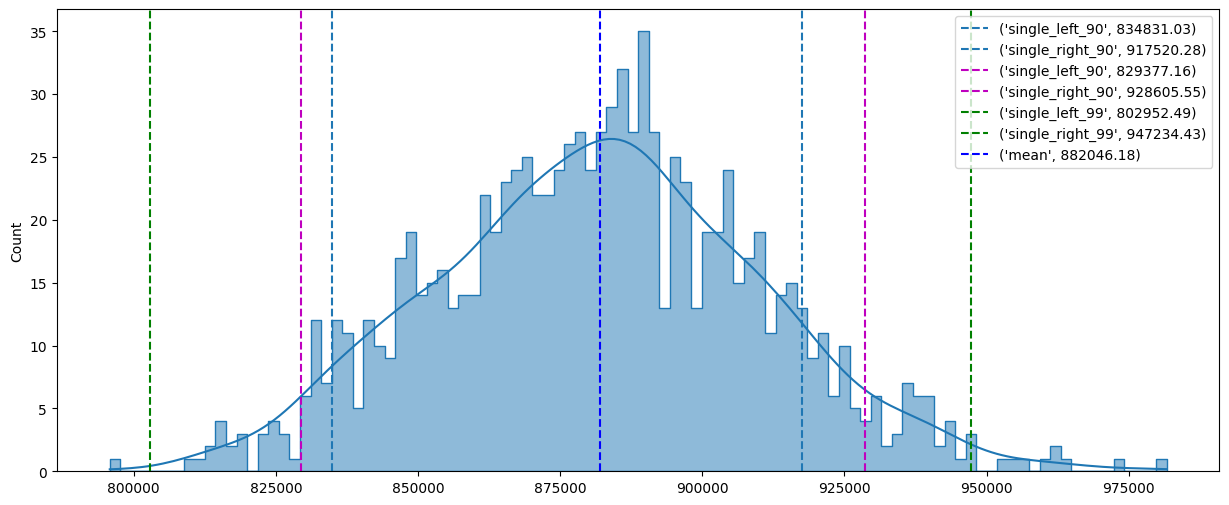

In [129]:
plt.figure(figsize=(15, 6))
sns.histplot(data=age_means, kde=True, fill=True, element="step", bins= 100)
# a = np.percentile(age_means, 5)
plt.axvline(a, label=("single_left_90",a ), linestyle= "--")
plt.axvline(b, label=("single_right_90", b), linestyle= "--")
plt.axvline(c, label=("single_left_90", c), linestyle= "--", color="m")
plt.axvline(d, label=("single_right_90", d), linestyle= "--", color="m")
plt.axvline(e, label=("single_left_99", e), linestyle= "--", color="g")
plt.axvline(f, label=("single_right_99", f), linestyle= "--", color="g")
plt.axvline(g, label= ("mean",g), linestyle="--", color="b")

plt.legend()
plt.show()

-   **age_46_to_50**

In [130]:
age_46_to_50

,age,user_id,purchase
0,46-50,1000004,206468
1,46-50,1000013,713927
2,46-50,1000033,1940418
3,46-50,1000035,821303
4,46-50,1000044,1180380
...,...,...,...
526,46-50,1006014,528238
527,46-50,1006016,3770970
528,46-50,1006032,517261
529,46-50,1006037,1119538


In [ ]:
mean_purchases = []
for sample_size in range(50, 500):
 sample_mean = age_46_to_50['purchase'].sample(sample_size).mean()
 mean_purchases.append(sample_mean)

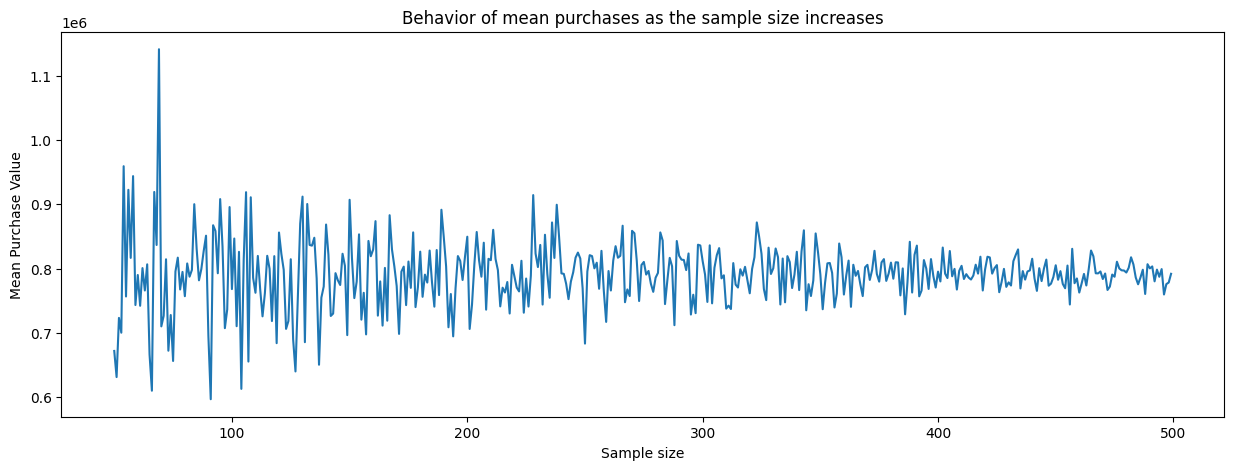

In [132]:
plt.figure(figsize=(15, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 500), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()


In [133]:
age_means= []
size = age_46_to_50['purchase'].shape[0]
for sample in range(1000):
  sample_mean = age_46_to_50['purchase'].sample(size, replace=True).mean()
  age_means.append(sample_mean)

In [134]:
a, b , c, d, e, f, g = cal_percetiles(age_means)

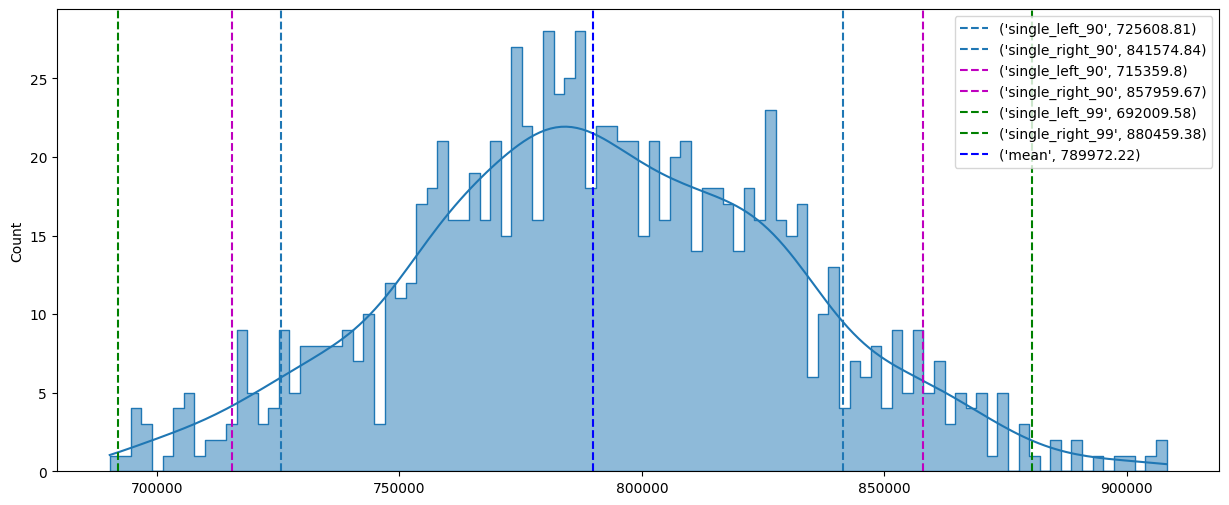

In [135]:
plt.figure(figsize=(15, 6))
sns.histplot(data=age_means, kde=True, fill=True, element="step", bins= 100)
# a = np.percentile(age_means, 5)
plt.axvline(a, label=("single_left_90",a ), linestyle= "--")
plt.axvline(b, label=("single_right_90", b), linestyle= "--")
plt.axvline(c, label=("single_left_90", c), linestyle= "--", color="m")
plt.axvline(d, label=("single_right_90", d), linestyle= "--", color="m")
plt.axvline(e, label=("single_left_99", e), linestyle= "--", color="g")
plt.axvline(f, label=("single_right_99", f), linestyle= "--", color="g")
plt.axvline(g, label= ("mean",g), linestyle="--", color="b")

plt.legend()
plt.show()

- **age_51_to_55**

In [136]:
age_51_to_55

,age,user_id,purchase
0,51-55,1000006,379930
1,51-55,1000017,1425995
2,51-55,1000054,187451
3,51-55,1000059,980118
4,51-55,1000060,280029
...,...,...,...
476,51-55,1005967,136189
477,51-55,1005993,130022
478,51-55,1006002,1843460
479,51-55,1006020,374475


In [137]:
mean_purchases = []
for sample_size in range(50, 450):
 sample_mean = age_51_to_55['purchase'].sample(sample_size).mean()
 mean_purchases.append(sample_mean)

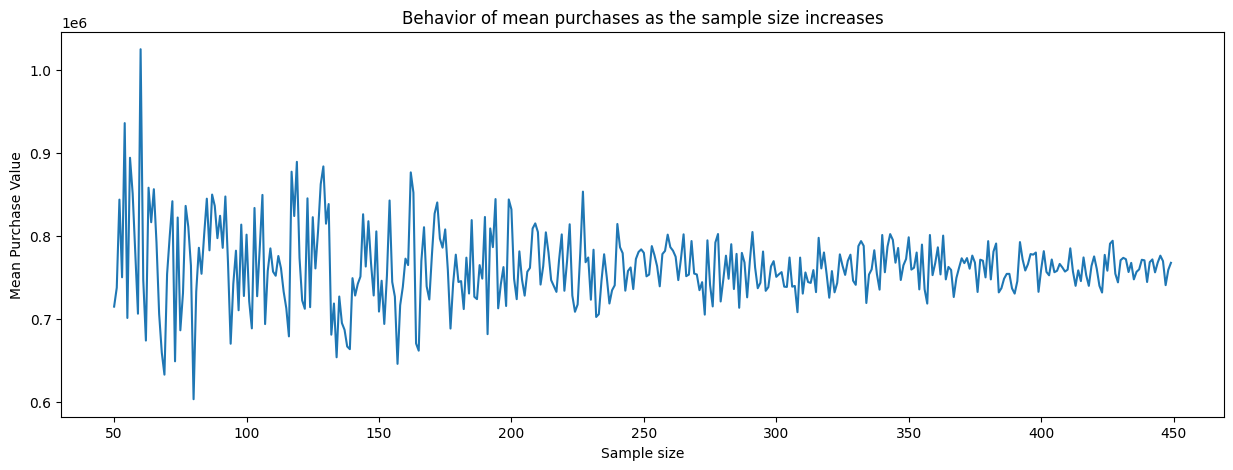

In [138]:
plt.figure(figsize=(15, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 450), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()

In [139]:
age_means= []
size = age_51_to_55['purchase'].shape[0]
for sample in range(1000):
  sample_mean = age_51_to_55['purchase'].sample(size, replace=True).mean()
  age_means.append(sample_mean)

In [140]:
a, b , c, d, e, f, g = cal_percetiles(age_means)

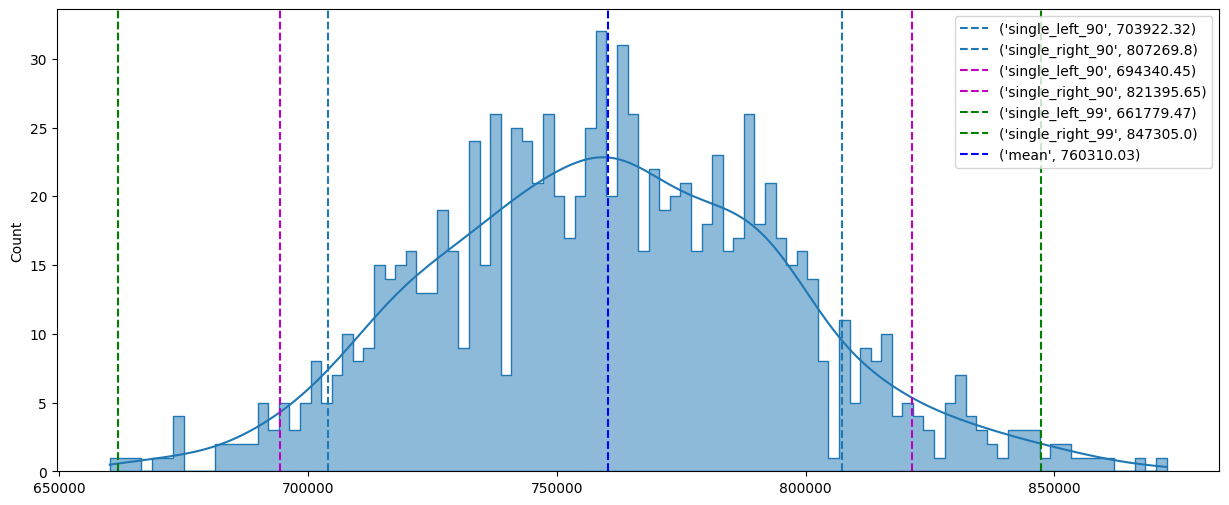

In [141]:
plt.figure(figsize=(15, 6))
sns.histplot(data=age_means, kde=True, fill=True, element="step", bins= 100)
# a = np.percentile(age_means, 5)
plt.axvline(a, label=("single_left_90",a ), linestyle= "--")
plt.axvline(b, label=("single_right_90", b), linestyle= "--")
plt.axvline(c, label=("single_left_90", c), linestyle= "--", color="m")
plt.axvline(d, label=("single_right_90", d), linestyle= "--", color="m")
plt.axvline(e, label=("single_left_99", e), linestyle= "--", color="g")
plt.axvline(f, label=("single_right_99", f), linestyle= "--", color="g")
plt.axvline(g, label= ("mean",g), linestyle="--", color="b")

plt.legend()
plt.show()

- **age_55_plus**

In [142]:
age_55_plus

,age,user_id,purchase
0,55+,1000002,810472
1,55+,1000031,496154
2,55+,1000080,339364
3,55+,1000089,112276
4,55+,1000090,1310621
...,...,...,...
367,55+,1005948,2120730
368,55+,1005968,282354
369,55+,1005980,1070641
370,55+,1005986,606283


In [159]:
mean_purchases = []
for sample_size in range(50, 350):
 sample_mean = age_55_plus['purchase'].sample(sample_size).mean()
 mean_purchases.append(sample_mean)

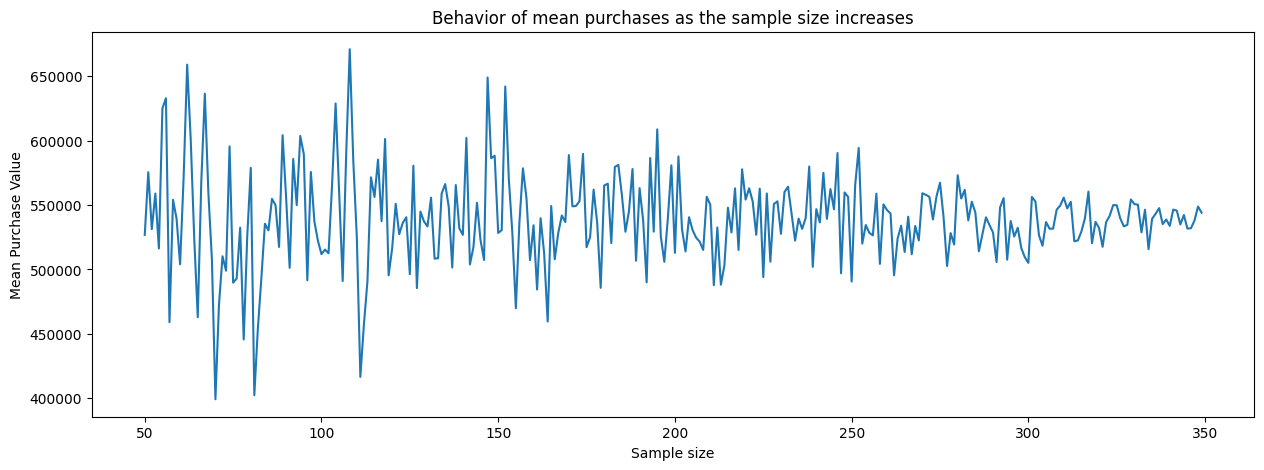

In [144]:
plt.figure(figsize=(15, 5))
plt.title('Behavior of mean purchases as the sample size increases')
plt.plot(np.arange(50, 350), mean_purchases)
plt.xlabel('Sample size')
plt.ylabel('Mean Purchase Value')
plt.show()


In [160]:
age_means= []
size = age_55_plus['purchase'].shape[0]
for sample in range(1000):
  sample_mean = age_55_plus['purchase'].sample(size, replace=True).mean()
  age_means.append(sample_mean)

In [146]:
a, b , c, d, e, f, g = cal_percetiles(age_means)


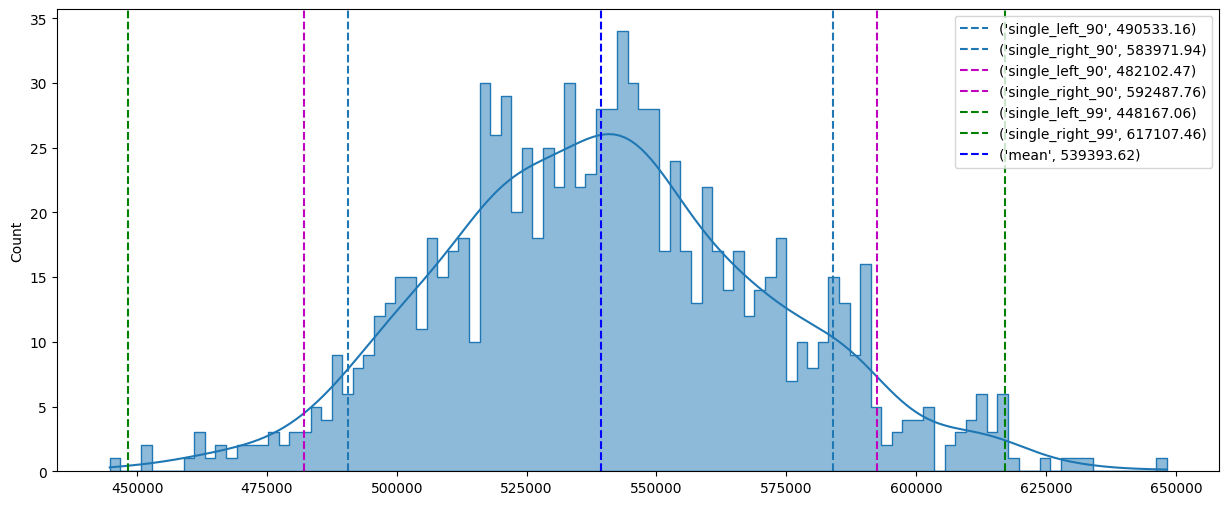

In [147]:
plt.figure(figsize=(15, 6))
sns.histplot(data=age_means, kde=True, fill=True, element="step", bins= 100)
# a = np.percentile(age_means, 5)
plt.axvline(a, label=("single_left_90",a ), linestyle= "--")
plt.axvline(b, label=("single_right_90", b), linestyle= "--")
plt.axvline(c, label=("single_left_90", c), linestyle= "--", color="m")
plt.axvline(d, label=("single_right_90", d), linestyle= "--", color="m")
plt.axvline(e, label=("single_left_99", e), linestyle= "--", color="g")
plt.axvline(f, label=("single_right_99", f), linestyle= "--", color="g")
plt.axvline(g, label= ("mean",g), linestyle="--", color="b")

plt.legend()
plt.show()

#Actionable insights
- Out of every four transactions made on Black Friday in the Walmart stores, three are made by the males and one is made by the
females.

- 82.33 % of the total transactions are made by the customers belonging to 11 occupations. These are 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6
(Ordered in descending order of the total transactions' share.)
Majority of the transactions (53.75 % of total transactions) are made by the customers having 1 or 2 years of stay in the current city.
- 82.43% of the total transactions are made for only 5 Product Categories. These are, 5, 1, 8, 11 and 2.
There are 1666 unique female customers and 4225 unique male customers. Average number of transactions made by each Male on
Black Friday is 98 while for Female it is 82.
On an average each male makes a total purchase of 925438.92 on Black Friday while for each female the figure is 712269.56.
- 76.72 % of the total revenue is generated from males.
Out of 5891 unique customers, 42 % of them are Married and 58 % of them are Single.
Average number of transactions made by each user with marital status Married is 91 and for Single it is 95.
On an average each Married customer makes a total purchase of 843469.79 on Black Friday while for each Single customer the figure
is 880526.31.
- 59.05 % of the total revenue is generated from the customers who are Single.
Majority of the transactions are made by the customers whose age is between 26 and 45 years.
About 81.82% of the total transactions are made by customers of age between 18 and 50 years.
- 81.82 % of total unique customers have age between 18 and 50 years.
Out of all unique customers, 35.85 % belong to the age group of 26 - 35 years, 19.81 % belong to the age group of 36 - 45 years,
- 18.15 % belong to the age group of 18 - 25 years, 9.01 % belong to the age group of 46 - 50 years.
Walmart generated 86.21 % of total revenue from customers in range 18 to 50 years on Black Friday.
- 39.87 % of the total revenue is generated from the customers having age group of 26 - 35 years, 20.15 % is generated from 36 - 45
years, 17.93 % from 18 - 25 years, 8.26 % from 46 - 50 years.
- Majority of the total unique customers belong to the city C. 82.26 % of the total unique customers belong to city C and B.
- Walmart generated 41.52 % of the total revenue from the customers belonging to the city B, 32.65 % from city C and 25.83 % from city
A on Black Friday.
- Top 5 product categories from which Walmart made 84.36 % of total revenue on Black Friday are 1, 5, 8, 6 and 2
- The population mean of total spending of each male will be approximately = 925156.36.
- The population mean of total spending of each female will be approximately = 711789.37
- The population mean of total spending of each single will be approximately = 880356.19
- The population mean of total spending of each male will be approximately = 843632.08
- The population mean of total spending of each customer in age group 0 -17 will be approximately = 617797.25
- The population mean of total spending of each customer in age group 18 - 25 will be approximately = 854676.31
- The population mean of total spending of each customer in age group 26 - 35 will be approximately = 989120.36
- The population mean of total spending of each customer in age group 36 - 45 will be approximately = 879434.88
- The population mean of total spending of each customer in age group 46 - 50 will be approximately = 792671.74


# Recommendations
- Targeted marketing: Since the majority of transactions are made by males, it would be beneficial to tailor marketing strategies to cater
to their preferences and needs. This could include specific promotions, product offerings, or advertising campaigns designed to attract
male customers.
- Focus on popular occupations: Given that 82.33% of transactions come from customers in 11 specific occupations, it would be wise
to focus marketing efforts on these occupations. Understanding the needs and preferences of individuals in these occupations can help
in creating targeted marketing campaigns and customized offers.
- Engage with new residents: As a significant portion of transactions (53.75%) come from customers who have recently moved to the
current city, it presents an opportunity to engage with these new residents. Targeted marketing, welcoming offers, and incentives for
newcomers can help capture their loyalty and increase their spending.
- Emphasize popular product categories: Since 82.43% of transactions are concentrated in just five product categories, allocating
resources and promotions towards these categories can maximize sales potential. Highlighting these popular categories and offering
attractive deals can encourage more purchases.
- Increase focus on single customers: Given that 59.05% of total revenue is generated by single customers, dedicating efforts to cater
to their needs and preferences can help drive more sales. Understanding their motivations and targeting them with personalized offers
can enhance their shopping experience and loyalt
- Competitive pricing and promotions: Continuously monitor competitors' pricing and promotional activities to ensure competitiveness.
Offer price-match guarantees or price comparison tools to instill confidence in customers that they are getting the best value for their
purchases